## Project Description:

#### Required Tasks
- Explore each data set using different descriptive and plotting methods. 
- Explore each dataset, check for missing data, and apply proper data imputation methods. 
- Apply the same preprocessing techniques on the regression_test. Note that the dataset don't have target columns. 
- Scale the dataset. Explain your choice of data scaling method. 
- Apply clustering methods discussed in class to study the structure of each dataset. Discuss how the outcome of clustering will help you better understand the structure of data. Provide result interpretation for each clustering model. 
- Regression dataset: Apply all the regression models you have learned in this class. Discuss the results and outcomes. Models with hyperparameters explain how you find the best value of the hyperparameters. 
- Find the best regression model among the list of models trained on the regression_train dataset. Use this model to predict the target values of the regression_test. 


#### Deliverable
Submit ONLY the iPython notebook(s) or the .py file(s) of your work. Use the following frame for your submission. Please don't remove the headers in the following structure. 

Make sure to list the name and student id of all the group members in your iPython notebook file. 

#### Rubric
| Descriptio | Fair | Good | excellent |
|:-----------|:------|:------|:----------|
|Preprocessing|Demonstrate limited understanding of preprocessing steps | Demonstrate a moderate ability to find a way to apply the preprocessing step to prepare the dataset for Machine learning models | Demonstrate the ability to choose the appropriate preprocessing model to prepare the dataset |
|learning model | Demonstrate limited understanding of methods used to train learning models | Demonstrate the ability to understand techniques used to train learning models with some effectiveness. This includes optimization algorithms, initialization, regularization, and hyperparameter search methods | Demonstrate ability to understand and apply various algorithms as well as initialization, regularization, and hyperparameter search methods |
|Final prediction |Demonstrate limited understanding of strategies to structure and end to end machine learning project | Demonstrate ability to understand classic ML strategies such as error analysis, data split, data collection and evaluation metric selection with some effectiveness | Demonstrates ability to structure the project and apply methods such as error analysis, data split, data collection, design a labeling process and select proper evaluation metrics to improve performance.

# Regression

### Data preparation

#### Training dataset

We imported the libraries need for data preprocessing - importing, manipulating and plotting. We then proceeded to import and explore the dataset column by column.

In [1]:
# import library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import train dataset
reg_train = pd.read_csv("Regression_train.csv")

In [3]:
# explore data
reg_train.head()

,Crash ID,Crash Severity,Crash Time,Day of Week,Manner of Collision,Speed Limit,Surface Condition,Surface Type,Surface Width,Weather Condition,Vehicle Body Style,Person Age,Person Alcohol Result,Person Drug Test Result,Person Ethnicity,Person Gender,y
0,19757646,N - NOT INJURED,16:34:00,FRIDAY,OPPOSITE DIRECTION - BOTH GOING STRAIGHT,40,1 - DRY,No Data,No Data,1 - CLEAR,BU - BUS,7,No Data,No Data,NaN,NaN,96
1,19759708,N - NOT INJURED,14:32:00,SATURDAY,ONE MOTOR VEHICLE - GOING STRAIGHT,70,1 - DRY,No Data,48,1 - CLEAR,SV - SPORT UTILITY VEHICLE,32,No Data,No Data,W - WHITE,2 - FEMALE,29
2,19659939,B - SUSPECTED MINOR INJURY,NaN,SATURDAY,SAME DIRECTION - ONE STRAIGHT-ONE STOPPED,50,1 - DRY,No Data,64,2 - CLOUDY,"P4 - PASSENGER CAR, 4-DOOR",NaN,No Data,97 - NOT APPLICABLE,W - WHITE,2 - FEMALE,51
3,19717414,N - NOT INJURED,08:18:00,WEDNESDAY,SAME DIRECTION - BOTH GOING STRAIGHT-SIDESWIPE,50,1 - DRY,No Data,72,1 - CLEAR,SV - SPORT UTILITY VEHICLE,40,No Data,97 - NOT APPLICABLE,B - BLACK,2 - FEMALE,75
4,19507708,N - NOT INJURED,17:50:00,NaN,SAME DIRECTION - ONE STRAIGHT-ONE STOPPED,40,1 - DRY,No Data,50,1 - CLEAR,PK - PICKUP,NaN,No Data,97 - NOT APPLICABLE,W - WHITE,1 - MALE,130


In [4]:
# data structure
reg_train.info()

# 13041 rows, 17 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13041 entries, 0 to 13040
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Crash ID                 13041 non-null  int64 
 1   Crash Severity           13041 non-null  object
 2   Crash Time               11721 non-null  object
 3   Day of Week              11688 non-null  object
 4   Manner of Collision      13041 non-null  object
 5   Speed Limit              13041 non-null  int64 
 6   Surface Condition        13041 non-null  object
 7   Surface Type             13041 non-null  object
 8   Surface Width            11731 non-null  object
 9   Weather Condition        11710 non-null  object
 10  Vehicle Body Style       11719 non-null  object
 11  Person Age               11763 non-null  object
 12  Person Alcohol Result    11767 non-null  object
 13  Person Drug Test Result  11718 non-null  object
 14  Person Ethnicity         11776 non-nul

We split reg_train into feature (X_train) and target (y) variable. The feature set are the first 16 columns. The target variable is the last column 'y' which is the amount of time (in minutes) it will take to clear an accident scene.

In [5]:
X_train = reg_train.drop(columns='y')
y_train = reg_train['y']

In [6]:
# check X_train, y_train
# X_train.info()
# y_train.info()

#### Data cleaning - column by column

Crash ID

In [7]:
# Crash ID
# unique values
X_train['Crash ID'].value_counts()

Crash ID
19695571    44
19750688    37
19746400    36
19716804    23
19719487    19
            ..
19693690     1
19719397     1
19681428     1
19488105     1
19681275     1
Name: count, Length: 5854, dtype: int64

After looking into the Crash ID column, we've decided to remove it. The reason is that the Crash ID seems to serve only as a unique identifier for an accident, and we believe it won't add value to the regression analysis. Additionally, we noticed instances of repeating Crash IDs, indicating multiple individuals involved in an accident, either in the same or different vehicles. Each instance of a Crash ID provides data about each person in the accident.

In [8]:
# drop Crash ID column
X_train.drop(columns = 'Crash ID', axis = 1, inplace = True)

Crash Severity

In [9]:
# value_count
X_train['Crash Severity'].value_counts()

# check for NAs
# sum(X_train['Crash Severity'].isna())
# O NAs

Crash Severity
N - NOT INJURED                 8688
B - SUSPECTED MINOR INJURY      1897
C - POSSIBLE INJURY             1861
A - SUSPECTED SERIOUS INJURY     310
99 - UNKNOWN                     245
K - FATAL INJURY                  40
Name: count, dtype: int64

We chose to assign a numerical code to the Crash Severity column based on the increasing order of seriousness, ranging from no injury to fatal injury. When dealing with missing data labeled as 99 (unknown) in this column, we opted to substitute it with the most common category, which is "not injured."

In [10]:
# ordinal encoding as there is an order in the crash severity
# N - NOT INJURED < B - SUSPECTED MINOR INJURY < C - POSSIBLE INJURY  
# < A - SUSPECTED SERIOUS INJURY < K - FATAL INJURY

# handling missing data: 99 - UNKNOWN 
# replace with most frequent (N - NOT INJURED)

# create dictionary for mapping
crash_dict = {'99 - UNKNOWN': 0,
              'N - NOT INJURED': 0,
              'B - SUSPECTED MINOR INJURY': 1,
              'C - POSSIBLE INJURY': 2,
              'A - SUSPECTED SERIOUS INJURY': 3,
              'K - FATAL INJURY': 4}
              
# apply mapping dictionary
X_train['Crash Severity'] = X_train['Crash Severity'].map(crash_dict)

Crash Time

In [11]:
# print column
X_train['Crash Time']

# check NAs
# sum(X_train['Crash Time'].isna())
# 1320 missing data of 13041 rows

0        16:34:00
1        14:32:00
2             NaN
3        08:18:00
4        17:50:00
           ...   
13036    15:39:00
13037    07:30:00
13038    18:46:00
13039    05:41:00
13040         NaN
Name: Crash Time, Length: 13041, dtype: object

The crash time represent the time of the day when the accident occurred. This is in the HH:MM:SS format. There are also 1320 missing data among the 13041 available data. 

To handle this column, the idea to focus on the hour component as we believe that staying at the granularity of the hour would be sufficient to capture the time aspect. We then proceed to group this hour component into periods of the day as we know that period of the day would play a key role in influencing how quickly an accident scene is cleared. For example, it would generally be easier to clear up an accident that happens during work hours than just after work hours or early evening as there would be more vehicles on the road to manage. 

To handle missing data, we propose replacing with the median value of the hour component after observing the kde plot.

c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


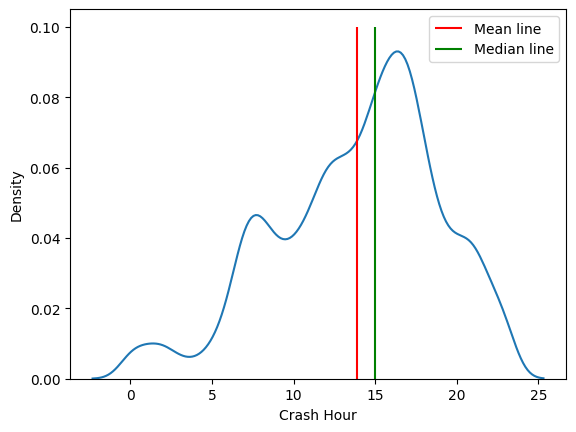

In [12]:

# extract hour component of crash time, called Crash Hour
X_train['Crash Hour'] = pd.to_datetime(X_train['Crash Time'], format='%H:%M:%S').dt.hour

# plot kde of crash hour column
sns.kdeplot(X_train['Crash Hour'])

# plot mean and median
plt.vlines(X_train['Crash Hour'].mean(), ymin = 0, ymax = 0.10, color = 'r', label = 'Mean line')
plt.vlines(X_train['Crash Hour'].median(), ymin = 0, ymax = 0.10, color = 'g', label = 'Median line')
plt.legend()

In [13]:
# from kde plot - fillna in Crash Hour with median value 
X_train['Crash Hour'] = X_train['Crash Hour'].fillna(X_train['Crash Hour'].median())

In [14]:
## mapping crash hour to period of the day
# mapping crash hour to period of day
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Evening','Night']

# 0-4: 'Late Night'
# 4-8: 'Early Morning'
# 8-12: 'Morning'
# 12-16: 'Noon'
# 16-20: 'Evening'
# 20-24: 'Night'

# Map 'Crash Hour' to period of the day; resulting column is called 'Crash Period'
X_train['Crash Period'] = pd.cut(X_train['Crash Hour'], bins=b, labels=l, include_lowest=True)

In [15]:
# drop Crash Time and Crash Hour columns
X_train.drop(columns = ['Crash Time', 'Crash Hour'], axis = 1, inplace = True)

In [16]:
# one hot encode Crash Period column
X_train['Crash Period'].value_counts()

# one_hot encode
X_train = pd.get_dummies(X_train, columns = ['Crash Period'], dtype= 'int')

# drop Crash Period_Night - regression
X_train = X_train.drop(columns='Crash Period_Night', axis = 1)

In [17]:
# check X_train
X_train.head()

,Crash Severity,Day of Week,Manner of Collision,Speed Limit,Surface Condition,Surface Type,Surface Width,Weather Condition,Vehicle Body Style,Person Age,Person Alcohol Result,Person Drug Test Result,Person Ethnicity,Person Gender,Crash Period_Late Night,Crash Period_Early Morning,Crash Period_Morning,Crash Period_Noon,Crash Period_Evening
0,0,FRIDAY,OPPOSITE DIRECTION - BOTH GOING STRAIGHT,40,1 - DRY,No Data,No Data,1 - CLEAR,BU - BUS,7,No Data,No Data,NaN,NaN,0,0,0,1,0
1,0,SATURDAY,ONE MOTOR VEHICLE - GOING STRAIGHT,70,1 - DRY,No Data,48,1 - CLEAR,SV - SPORT UTILITY VEHICLE,32,No Data,No Data,W - WHITE,2 - FEMALE,0,0,0,1,0
2,1,SATURDAY,SAME DIRECTION - ONE STRAIGHT-ONE STOPPED,50,1 - DRY,No Data,64,2 - CLOUDY,"P4 - PASSENGER CAR, 4-DOOR",NaN,No Data,97 - NOT APPLICABLE,W - WHITE,2 - FEMALE,0,0,0,1,0
3,0,WEDNESDAY,SAME DIRECTION - BOTH GOING STRAIGHT-SIDESWIPE,50,1 - DRY,No Data,72,1 - CLEAR,SV - SPORT UTILITY VEHICLE,40,No Data,97 - NOT APPLICABLE,B - BLACK,2 - FEMALE,0,1,0,0,0
4,0,NaN,SAME DIRECTION - ONE STRAIGHT-ONE STOPPED,40,1 - DRY,No Data,50,1 - CLEAR,PK - PICKUP,NaN,No Data,97 - NOT APPLICABLE,W - WHITE,1 - MALE,0,0,0,0,1


Day of Week

In [18]:
# value_count
X_train['Day of Week'].value_counts()

# number of NA
# sum(X_train['Day of Week'].isna())
# 1353 NAs

Day of Week
FRIDAY       1923
THURSDAY     1749
MONDAY       1695
WEDNESDAY    1683
TUESDAY      1660
SATURDAY     1568
SUNDAY       1410
Name: count, dtype: int64

We see from the value_counts that the different days of the week have similar number of occurence in the dataset. We also checked for NAs and saw 1353 occurence. Seeing the close number of occurences of the days of the week, we faced the challenge of filling the NAs. This is because using the simple method of filling NAs with mode will overexaggerate the occurence of Friday in our dataset. Although we could have explored more complicated method to fill the NAs (for example, using the Nearest Neighbour approach), we opted to drop the Day of Week column. 

In [19]:
# drop column
X_train.drop(columns='Day of Week', axis = 1, inplace = True)

Manner of Collision

In [20]:
# value count
X_train['Manner of Collision'].value_counts()
# 36 unique values
# supergroup: same direction, opposite direction, angle, one motor vehicle, other

# check for NAs
# sum(X_train['Manner of Collision'].isna())
# 0 NAs

Manner of Collision
SAME DIRECTION - ONE STRAIGHT-ONE STOPPED                      2115
SAME DIRECTION - BOTH GOING STRAIGHT-SIDESWIPE                 1726
ANGLE - BOTH GOING STRAIGHT                                    1711
SAME DIRECTION - BOTH GOING STRAIGHT-REAR END                  1621
OPPOSITE DIRECTION - ONE STRAIGHT-ONE LEFT TURN                1370
ONE MOTOR VEHICLE - GOING STRAIGHT                             1257
ANGLE - ONE STRAIGHT-ONE LEFT TURN                              938
ANGLE - ONE STRAIGHT-ONE RIGHT TURN                             461
SAME DIRECTION - ONE STRAIGHT-ONE LEFT TURN                     292
SAME DIRECTION - ONE STRAIGHT-ONE RIGHT TURN                    206
ONE MOTOR VEHICLE - TURNING LEFT                                187
ONE MOTOR VEHICLE - BACKING                                     144
OPPOSITE DIRECTION - BOTH GOING STRAIGHT                        130
SAME DIRECTION - BOTH LEFT TURN                                 112
SAME DIRECTION - BOTH RIGHT 

To transform this column, we opted to group similar Manner of Collision together. We call this supergroup and name them Same Direction, Opposite Direction, Angle, One Motor Vehicle, and Other. There are no NAs in this column.

In [21]:

# rename X_train before creating supergroup
X_train_2 = X_train

# Create supergroup - same direction, opposite direction, angle, one motor vehicle, other
# Same direction
X_train_2.loc[X_train_2['Manner of Collision'].str.contains('Same direction', case = False), 'Manner of Collision'] = 'Same Direction'

# Opposite direction
X_train_2.loc[X_train_2['Manner of Collision'].str.contains('Opposite direction', case = False), 'Manner of Collision'] = 'Opposite Direction'

# Angle
X_train_2.loc[X_train_2['Manner of Collision'].str.contains('Angle', case = False), 'Manner of Collision'] = 'Angle'

# One motor vehicle
X_train_2.loc[X_train_2['Manner of Collision'].str.contains('One motor vehicle', case = False), 'Manner of Collision'] = 'One motor'

# Other -
X_train_2.loc[X_train_2['Manner of Collision'].str.contains('Other', case = False), 'Manner of Collision'] = 'Other'

In [22]:
# X_train_2

# one hot encode X_train_2['Manner of Collision']
X_train_2 = pd.get_dummies(X_train_2, columns = ['Manner of Collision'], dtype= 'int')

As we are working on Regression dataset, we dropped one of the dummy variables: Manner of Collision_Same Direction

In [23]:
# drop Manner of Collision_Same Direction
X_train_2 = X_train_2.drop('Manner of Collision_Same Direction', axis = 1)

In [24]:
X_train_2.head()

,Crash Severity,Speed Limit,Surface Condition,Surface Type,Surface Width,Weather Condition,Vehicle Body Style,Person Age,Person Alcohol Result,Person Drug Test Result,...,Person Gender,Crash Period_Late Night,Crash Period_Early Morning,Crash Period_Morning,Crash Period_Noon,Crash Period_Evening,Manner of Collision_Angle,Manner of Collision_One motor,Manner of Collision_Opposite Direction,Manner of Collision_Other
0,0,40,1 - DRY,No Data,No Data,1 - CLEAR,BU - BUS,7,No Data,No Data,...,NaN,0,0,0,1,0,0,0,1,0
1,0,70,1 - DRY,No Data,48,1 - CLEAR,SV - SPORT UTILITY VEHICLE,32,No Data,No Data,...,2 - FEMALE,0,0,0,1,0,0,1,0,0
2,1,50,1 - DRY,No Data,64,2 - CLOUDY,"P4 - PASSENGER CAR, 4-DOOR",NaN,No Data,97 - NOT APPLICABLE,...,2 - FEMALE,0,0,0,1,0,0,0,0,0
3,0,50,1 - DRY,No Data,72,1 - CLEAR,SV - SPORT UTILITY VEHICLE,40,No Data,97 - NOT APPLICABLE,...,2 - FEMALE,0,1,0,0,0,0,0,0,0
4,0,40,1 - DRY,No Data,50,1 - CLEAR,PK - PICKUP,NaN,No Data,97 - NOT APPLICABLE,...,1 - MALE,0,0,0,0,1,0,0,0,0


Speed Limit


In [25]:
# check for NAs
sum(X_train_2['Speed Limit'].isna())
# 0 NAs
# Speed Limit is good - int64 datatype, no NAs

X_train_2['Speed Limit'].value_counts()

Speed Limit
 45    2281
 50    2259
 70    2132
 40    1419
 30    1331
 35    1181
 55     826
 60     481
-1      370
 25     291
 65     104
 10      87
 75      84
 20      68
 5       64
 15      63
Name: count, dtype: int64

From the value_counts, there are 370 instances of speed limit of -1 which is the lowest speed limit. However, speed limit cannot be -1 in practice. From the data description, we understand the speed limit column as the speed limit of the road where the crash occured. A value of -1 for speed limit is thus treated as missing data and replaced with the median value after checking the kde plot.

In [26]:
# replace values of -1 with np.nan
X_train_2.loc[(X_train_2['Speed Limit'] == -1), 'Speed Limit'] = np.nan

c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


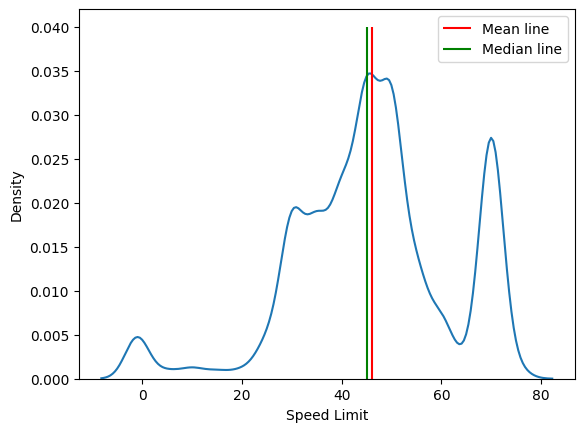

In [27]:
# plot kde of Speed Limit to determine appropriate method to fill missing data

# plot kde of crash hour column
sns.kdeplot(X_train['Speed Limit'])

# plot mean and median
plt.vlines(X_train['Speed Limit'].mean(), ymin = 0, ymax = 0.04, color = 'r', label = 'Mean line')
plt.vlines(X_train['Speed Limit'].median(), ymin = 0, ymax = 0.04, color = 'g', label = 'Median line')
plt.legend()

In [28]:
# fillna with median value 
sl_med = X_train_2['Speed Limit'].median()
X_train_2['Speed Limit'] = X_train_2['Speed Limit'].fillna(sl_med)

Surface Condition

In [29]:
X_train_2['Surface Condition'].value_counts()

Surface Condition
1 - DRY                              12122
2 - WET                                845
99 - UNKNOWN                            35
3 - STANDING WATER                      17
7 - SAND, MUD, DIRT                     11
98 - OTHER (EXPLAIN IN NARRATIVE)       11
Name: count, dtype: int64

In [30]:
# check na
sum(X_train_2['Surface Condition'].isna())
# No NAs

0

In [31]:
# replace 98 - OTHER and 99 - UNKNOWN with most frequent (1 - DRY)

# 98 - OTHER
X_train_2.loc[X_train_2['Surface Condition'].str.contains('98 - OTHER', case = False), 'Surface Condition'] = '1 - DRY'

# 99 - UNKNOWN
X_train_2.loc[X_train_2['Surface Condition'].str.contains('99 - UNKNOWN', case = False), 'Surface Condition'] = '1 - DRY'

In [32]:
# replace with ordinal mapping
# 1 - DRY as 1 and other categories as 0
X_train_2['Surface Condition'] = np.where(X_train_2['Surface Condition'] == '1 - DRY', 1,0)

Surface Type

In [33]:
# value_counts
X_train_2['Surface Type'].value_counts()


Surface Type
No Data    13041
Name: count, dtype: int64

The Surface Type column contains no data. We would be dropping this column.

In [34]:
# drop column - No data
X_train_2.drop(columns = 'Surface Type', axis = 1, inplace = True)

Surface Width

In [35]:
# value_counts
X_train_2['Surface Width'].value_counts()
# No Data is 5174 (39.68% of dataset)

# check for NAs
# sum(X_train_2['Surface Width'].isna())
# 1310 NAs

Surface Width
No Data    5174
72         2332
48         1755
24          466
64          420
66          189
22          182
50          162
20          146
88          144
44          129
55           99
84           77
52           63
76           59
92           51
78           49
28           39
65           36
89           35
67           30
40           30
74           21
69           19
38           12
26            4
58            3
36            3
62            2
Name: count, dtype: int64

Surface Width column has 5174 No Data and 1310 NAs. This makes up approx. 50% of the data. We decided to drop this column due to the high number of missing data.

In [36]:
# drop column surface width - high number of NAs
X_train_2.drop(columns = 'Surface Width', axis = 1, inplace = True)

In [37]:
X_train_2.head()

,Crash Severity,Speed Limit,Surface Condition,Weather Condition,Vehicle Body Style,Person Age,Person Alcohol Result,Person Drug Test Result,Person Ethnicity,Person Gender,Crash Period_Late Night,Crash Period_Early Morning,Crash Period_Morning,Crash Period_Noon,Crash Period_Evening,Manner of Collision_Angle,Manner of Collision_One motor,Manner of Collision_Opposite Direction,Manner of Collision_Other
0,0,40.0,1,1 - CLEAR,BU - BUS,7,No Data,No Data,NaN,NaN,0,0,0,1,0,0,0,1,0
1,0,70.0,1,1 - CLEAR,SV - SPORT UTILITY VEHICLE,32,No Data,No Data,W - WHITE,2 - FEMALE,0,0,0,1,0,0,1,0,0
2,1,50.0,1,2 - CLOUDY,"P4 - PASSENGER CAR, 4-DOOR",NaN,No Data,97 - NOT APPLICABLE,W - WHITE,2 - FEMALE,0,0,0,1,0,0,0,0,0
3,0,50.0,1,1 - CLEAR,SV - SPORT UTILITY VEHICLE,40,No Data,97 - NOT APPLICABLE,B - BLACK,2 - FEMALE,0,1,0,0,0,0,0,0,0
4,0,40.0,1,1 - CLEAR,PK - PICKUP,NaN,No Data,97 - NOT APPLICABLE,W - WHITE,1 - MALE,0,0,0,0,1,0,0,0,0


Weather Condition

In [38]:
X_train_2['Weather Condition'].value_counts()

Weather Condition
1 - CLEAR                            9947
2 - CLOUDY                           1194
3 - RAIN                              512
99 - UNKNOWN                           40
6 - FOG                                 9
98 - OTHER (EXPLAIN IN NARRATIVE)       8
Name: count, dtype: int64

In [39]:
# sum NAs
sum(X_train_2['Weather Condition'].isna())
# 1331 NAs

# replace NAs with mode
wc_mode = X_train_2['Weather Condition'].mode()[0]
X_train_2['Weather Condition'] = X_train_2['Weather Condition'].fillna(wc_mode)

In [40]:
# replace 99 - UNKNOWN and 98 - OTHER with most frequent (1 - CLEAR)
# 99 - unknown
X_train_2.loc[X_train_2['Weather Condition'].str.contains('99 - UNKNOWN', case = False), 'Weather Condition'] = '1 - CLEAR'

# 98 - OTHER (EXPLAIN IN NARRATIVE)
X_train_2.loc[X_train_2['Weather Condition'].str.contains('98 - OTHER ', case = False), 'Weather Condition'] = '1 - CLEAR'

In [41]:
X_train_2['Weather Condition'].value_counts()

Weather Condition
1 - CLEAR     11326
2 - CLOUDY     1194
3 - RAIN        512
6 - FOG           9
Name: count, dtype: int64

In [42]:
# map into clear, cloudy and rain/fog
weather_dict = {'1 - CLEAR': 0,
                '2 - CLOUDY':1,
                '3 - RAIN': 2,
                '6 - FOG': 2}

# # apply mapping dictionary
X_train_2['Weather Condition'] = X_train_2['Weather Condition'].map(weather_dict)

Vehicle Body Style

In [43]:
# unique values
X_train_2['Vehicle Body Style'].unique()
# 19 unique values

# value counts
X_train_2['Vehicle Body Style'].value_counts()

# check for NAs
# sum(X_train_2['Vehicle Body Style'].isna())
# 1322 NAs
# outside 330 '99 - UNKNOWN', 91 'No data' and 28 '98 - OTHER...'

Vehicle Body Style
P4 - PASSENGER CAR, 4-DOOR                     4336
SV - SPORT UTILITY VEHICLE                     3301
PK - PICKUP                                    1855
VN - VAN                                        466
P2 - PASSENGER CAR, 2-DOOR                      440
99 - UNKNOWN                                    330
TR - TRUCK                                      300
TT - TRUCK TRACTOR                              204
MC - MOTORCYCLE                                 100
SB - YELLOW SCHOOL BUS                           98
BU - BUS                                         98
No Data                                          91
98 - OTHER  (EXPLAIN IN NARRATIVE)               28
FT - FIRE TRUCK                                  24
PC - POLICE CAR/TRUCK                            23
AM - AMBULANCE                                   13
EV - NEV-NEIGHBORHOOD ELECTRIC VEHICLE            9
TL - TRAILER, SEMI-TRAILER, OR POLE TRAILER       3
Name: count, dtype: int64

We opted to drop the Vehicle Body Style column. This is to avoid increasing the dimension of the dataset signficantly if we one-hot encode this column. Filling the NAs was also a challenge.

In [44]:
# For now, drop column Vehicle Body Style
X_train_2.drop(columns = ['Vehicle Body Style'], axis = 1, inplace= True)

Person Age

In [45]:
# NAs
sum(X_train_2['Person Age'].isna())
# 1278 NAs

# value_count
X_train_2['Person Age'].value_counts()
# 660 No data

Person Age
No Data    660
18         366
19         352
20         320
23         318
          ... 
91           2
96           1
95           1
99           1
93           1
Name: count, Length: 97, dtype: int64

There are 1278 NAs and 660 No Data in the Person Age column. We thus chose the drop this column as filling missing data with mean, median or most frequent would skew the dataset. 

In [46]:
# For now, drop column Person Age
# 1938 missing data 

X_train_2.drop(columns = ['Person Age'], axis = 1, inplace= True)

Person Alcohol Result

In [47]:
# NAs
sum(X_train_2['Person Alcohol Result'].isna())
# 1274 NAs

# value_count
X_train_2['Person Alcohol Result'].value_counts()
# 11736 No data (90% of data)

Person Alcohol Result
No Data         11736
1 - POSITIVE       24
2 - NEGATIVE        7
Name: count, dtype: int64

In [48]:
len(X_train_2['Person Alcohol Result'])

13041

Although missing data (No Data and NAs) makes up 99.76% of the Person Alcohol Result column, we still choose to keep this column due to the importance of a person's alcohol level in the occurence of an accident and its possible severity. 

In [49]:
# use a np.where and assign No Data/Negative as 1 and 1 - Positive as 0
# This is because positive alcohol result is very likely to influence the severity of accident
# and hence, the lenght of time it takes to clear the site.

X_train_2['Person Alcohol Result'] = np.where(X_train_2['Person Alcohol Result'] == '1 - POSITIVE', 0,1)

In [50]:
X_train_2.head()

,Crash Severity,Speed Limit,Surface Condition,Weather Condition,Person Alcohol Result,Person Drug Test Result,Person Ethnicity,Person Gender,Crash Period_Late Night,Crash Period_Early Morning,Crash Period_Morning,Crash Period_Noon,Crash Period_Evening,Manner of Collision_Angle,Manner of Collision_One motor,Manner of Collision_Opposite Direction,Manner of Collision_Other
0,0,40.0,1,0,1,No Data,NaN,NaN,0,0,0,1,0,0,0,1,0
1,0,70.0,1,0,1,No Data,W - WHITE,2 - FEMALE,0,0,0,1,0,0,1,0,0
2,1,50.0,1,1,1,97 - NOT APPLICABLE,W - WHITE,2 - FEMALE,0,0,0,1,0,0,0,0,0
3,0,50.0,1,0,1,97 - NOT APPLICABLE,B - BLACK,2 - FEMALE,0,1,0,0,0,0,0,0,0
4,0,40.0,1,0,1,97 - NOT APPLICABLE,W - WHITE,1 - MALE,0,0,0,0,1,0,0,0,0


Person Drug Test Result

In [51]:
# value_count
X_train_2['Person Drug Test Result'].value_counts()
# 97 - NOT APPLICABLE: 8418
# No Data: 3210
# 99 - UNKNOWN: 85
# 2 - Negative: 4

# NAs
# sum(X_train_2['Person Drug Test Result'].isna())
# 1323 NAs

# Not applicable, No data, Unknown, NA total: 13036 (99.96% of data)

# Only 1 positive data

Person Drug Test Result
97 - NOT APPLICABLE    8418
No Data                3210
99 - UNKNOWN             85
2 - NEGATIVE              4
1 - POSITIVE              1
Name: count, dtype: int64

There are only 1 positive data in this column. We thus chosse to drop the column.

In [52]:
# Decsion: Drop column: only 1 positive result
# drop column - ['Person Drug Test Result']
X_train_2.drop(columns = 'Person Drug Test Result', axis = 1, inplace = True)


Person Ethnicity

In [53]:
# NAs
sum(X_train_2['Person Ethnicity'].isna())
# 1265 NAs

# value_count
X_train_2['Person Ethnicity'].value_counts()

Person Ethnicity
W - WHITE                          5533
H - HISPANIC                       2552
B - BLACK                          1821
A - ASIAN                           957
99 - UNKNOWN                        695
I - AMER. INDIAN/ALASKAN NATIVE     100
98 - OTHER                           64
No Data                              54
Name: count, dtype: int64

We chose to fill NAs with the most frequent category, which is White. We also filled instance of '99 - UNKNOWN', '98 - OTHER' and No Data with the most frequent category. We then grouped Asian and Amer. Indian/Alaskan Native as Others.

In [54]:
# fill NAs with most frequent - White
X_train_2['Person Ethnicity'] = X_train_2['Person Ethnicity'].fillna('White')

In [55]:
# W - WHITE
X_train_2.loc[X_train_2['Person Ethnicity'].str.contains('W - WHITE', case = False), 'Person Ethnicity'] = 'White'

# H - HISPANIC
X_train_2.loc[X_train_2['Person Ethnicity'].str.contains('H - HISPANIC', case = False), 'Person Ethnicity'] = 'Hispanic'

# B - BLACK
X_train_2.loc[X_train_2['Person Ethnicity'].str.contains('B - BLACK', case = False), 'Person Ethnicity'] = 'Black'

# A - ASIAN
X_train_2.loc[X_train_2['Person Ethnicity'].str.contains('A - ASIAN', case = False), 'Person Ethnicity'] = 'Asian_AmerIndian'

# 99 - UNKNOWN
X_train_2.loc[X_train_2['Person Ethnicity'].str.contains('99 - UNKNOWN', case = False), 'Person Ethnicity'] = 'White'

# I - AMER. INDIAN/ALASKAN NATIVE 
X_train_2.loc[X_train_2['Person Ethnicity'].str.contains('I - AMER. INDIAN/ALASKAN NATIVE', case = False), 'Person Ethnicity'] = 'Asian_AmerIndian'

# 98 - OTHER
X_train_2.loc[X_train_2['Person Ethnicity'].str.contains('98 - OTHER', case = False), 'Person Ethnicity'] = 'White'

# No Data 
X_train_2.loc[X_train_2['Person Ethnicity'].str.contains('No Data', case = False), 'Person Ethnicity'] = 'White'

In [56]:
X_train_2.head()

,Crash Severity,Speed Limit,Surface Condition,Weather Condition,Person Alcohol Result,Person Ethnicity,Person Gender,Crash Period_Late Night,Crash Period_Early Morning,Crash Period_Morning,Crash Period_Noon,Crash Period_Evening,Manner of Collision_Angle,Manner of Collision_One motor,Manner of Collision_Opposite Direction,Manner of Collision_Other
0,0,40.0,1,0,1,White,NaN,0,0,0,1,0,0,0,1,0
1,0,70.0,1,0,1,White,2 - FEMALE,0,0,0,1,0,0,1,0,0
2,1,50.0,1,1,1,White,2 - FEMALE,0,0,0,1,0,0,0,0,0
3,0,50.0,1,0,1,Black,2 - FEMALE,0,1,0,0,0,0,0,0,0
4,0,40.0,1,0,1,White,1 - MALE,0,0,0,0,1,0,0,0,0


We one-hot encode this column and dropped Person Ethnicity_Others as the reference dummy variable.

In [57]:
# one hot encode 'Person Ethnicity' column
X_train_2 = pd.get_dummies(X_train_2, columns = ['Person Ethnicity'], dtype= 'int')

# drop Person Ethnicity_Asian_AmerIndian - regression
X_train_2 = X_train_2.drop(columns='Person Ethnicity_Asian_AmerIndian', axis = 1)

In [58]:
X_train_2.head()

,Crash Severity,Speed Limit,Surface Condition,Weather Condition,Person Alcohol Result,Person Gender,Crash Period_Late Night,Crash Period_Early Morning,Crash Period_Morning,Crash Period_Noon,Crash Period_Evening,Manner of Collision_Angle,Manner of Collision_One motor,Manner of Collision_Opposite Direction,Manner of Collision_Other,Person Ethnicity_Black,Person Ethnicity_Hispanic,Person Ethnicity_White
0,0,40.0,1,0,1,NaN,0,0,0,1,0,0,0,1,0,0,0,1
1,0,70.0,1,0,1,2 - FEMALE,0,0,0,1,0,0,1,0,0,0,0,1
2,1,50.0,1,1,1,2 - FEMALE,0,0,0,1,0,0,0,0,0,0,0,1
3,0,50.0,1,0,1,2 - FEMALE,0,1,0,0,0,0,0,0,0,1,0,0
4,0,40.0,1,0,1,1 - MALE,0,0,0,0,1,0,0,0,0,0,0,1


Person Gender

In [59]:
# NAs
sum(X_train_2['Person Gender'].isna())
# 1284 NAs

# value_count
X_train_2['Person Gender'].value_counts()
# 1 - MALE        6168
# 2 - FEMALE      5013
# 99 - UNKNOWN     576

Person Gender
1 - MALE        6168
2 - FEMALE      5013
99 - UNKNOWN     576
Name: count, dtype: int64

We replace the NAs and '99 - UNKNOWN' with the most frequent variable, which is Male. 

In [60]:
# fill NAs with Others
X_train_2['Person Gender'] = X_train_2['Person Gender'].fillna('Male')

# 1 - MALE
X_train_2.loc[X_train_2['Person Gender'].str.contains('1 - MALE', case = False), 'Person Gender'] = 'Male'

# 2 - FEMALE
X_train_2.loc[X_train_2['Person Gender'].str.contains('2 - FEMALE', case = False), 'Person Gender'] = 'Female'

# 99 - UNKNOWN
X_train_2.loc[X_train_2['Person Gender'].str.contains('99 - UNKNOWN', case = False), 'Person Gender'] = 'Male'

In [61]:
X_train_2['Person Gender'].value_counts()

Person Gender
Male      8028
Female    5013
Name: count, dtype: int64

We then replace Male with 1 and Female with 0

In [62]:
X_train_2['Person Gender'] = np.where(X_train_2['Person Gender'] == 'Male', 1,0)

In [63]:
X_train_2.head()

,Crash Severity,Speed Limit,Surface Condition,Weather Condition,Person Alcohol Result,Person Gender,Crash Period_Late Night,Crash Period_Early Morning,Crash Period_Morning,Crash Period_Noon,Crash Period_Evening,Manner of Collision_Angle,Manner of Collision_One motor,Manner of Collision_Opposite Direction,Manner of Collision_Other,Person Ethnicity_Black,Person Ethnicity_Hispanic,Person Ethnicity_White
0,0,40.0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1
1,0,70.0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
2,1,50.0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,50.0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,40.0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1


In [64]:
X_train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13041 entries, 0 to 13040
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Crash Severity                          13041 non-null  int64  
 1   Speed Limit                             13041 non-null  float64
 2   Surface Condition                       13041 non-null  int32  
 3   Weather Condition                       13041 non-null  int64  
 4   Person Alcohol Result                   13041 non-null  int32  
 5   Person Gender                           13041 non-null  int32  
 6   Crash Period_Late Night                 13041 non-null  int32  
 7   Crash Period_Early Morning              13041 non-null  int32  
 8   Crash Period_Morning                    13041 non-null  int32  
 9   Crash Period_Noon                       13041 non-null  int32  
 10  Crash Period_Evening                    13041 non-null  in

In [65]:
# rename cleaned data
X_train_clean = X_train_2

Summary of Data Cleaning - Regression Train dataset

1. Crash ID: Drop
2. Crash Severity: Ordinal mapping. Map '99 - UNKNOWN': 0, 'N - NOT INJURED': 0, 'B - SUSPECTED MINOR INJURY': 1, 'C - POSSIBLE INJURY': 2, 'A - SUSPECTED SERIOUS INJURY': 3, 'K - FATAL INJURY': 4.
3. Crash Time: Extract hour component; fill NAs with median hour; group into Period of a day ['Late Night', 'Early Morning','Morning', 'Noon', 'Evening', 'Night']; one-hot encode Period; drop Crash Period_Night
4. Days of the Week: Drop
5. Manner of Collision: Group into similar manner of collision; one-hot encode Group; drop Manner of Collision_Same Direction
6. Speed Limit: Replace instances of -1 with median speed limit.
7. Surface Condition: Fill NAs, '98 - OTHER' and '99 - UNKNOWN' with mode ('1 - DRY'). Map '1 - DRY' to 1 and other categories as 0.
8. Surface Type: Drop
9. Surface Width: Drop
10. Weather Condition: Fill NAs, '98 - OTHER' and '99 - UNKNOWN' with mode ('1 - CLEAR'). Map '1 - CLEAR': 0, '2 - CLOUDY':1, '3 - RAIN': 2, '6 - FOG': 2.
11. Vehicle Body Style: Drop
12. Person Age: Drop
13. Person Alcohol Result: Map '1 - POSITIVE' as 0 and other catergory as 1.
14. Person Drug Test Result: Drop
15. Person Ethnicity: One-hot encode; drop Person Ethnicity_Others
16. Person Gender: fill NAs with Male, map Male to 1 and Female to 0.

#### Testing dataset

In [66]:
# Import testing dataset
reg_test = pd.read_csv('Regression_test.csv')

In [67]:
# First 5 entries of dataset
reg_test.head()

,Crash ID,Crash Severity,Crash Time,Day of Week,Manner of Collision,Speed Limit,Surface Condition,Surface Type,Surface Width,Weather Condition,Vehicle Body Style,Person Age,Person Alcohol Result,Person Drug Test Result,Person Ethnicity,Person Gender
0,19557223,B - SUSPECTED MINOR INJURY,13:07:00,THURSDAY,ANGLE - BOTH GOING STRAIGHT,40,1 - DRY,No Data,No Data,1 - CLEAR,MC - MOTORCYCLE,34,No Data,97 - NOT APPLICABLE,H - HISPANIC,1 - MALE
1,19569186,N - NOT INJURED,11:35:00,NaN,SAME DIRECTION - BOTH GOING STRAIGHT-SIDESWIPE,70,1 - DRY,No Data,48,2 - CLOUDY,SV - SPORT UTILITY VEHICLE,49,No Data,97 - NOT APPLICABLE,W - WHITE,NaN
2,19724613,B - SUSPECTED MINOR INJURY,20:51:00,THURSDAY,ANGLE - BOTH GOING STRAIGHT,50,1 - DRY,No Data,76,1 - CLEAR,"P4 - PASSENGER CAR, 4-DOOR",NaN,No Data,97 - NOT APPLICABLE,H - HISPANIC,1 - MALE
3,19647779,N - NOT INJURED,19:33:00,WEDNESDAY,ANGLE - ONE STRAIGHT-ONE RIGHT TURN,50,1 - DRY,No Data,72,1 - CLEAR,"P4 - PASSENGER CAR, 4-DOOR",22,No Data,No Data,W - WHITE,2 - FEMALE
4,19526461,N - NOT INJURED,18:32:00,FRIDAY,SAME DIRECTION - BOTH GOING STRAIGHT-SIDESWIPE,45,1 - DRY,No Data,72,1 - CLEAR,"P4 - PASSENGER CAR, 4-DOOR",23,No Data,97 - NOT APPLICABLE,NaN,1 - MALE


In [68]:
# Structure of the dataset
reg_test.info()

# 3261 rows, 16 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Crash ID                 3261 non-null   int64 
 1   Crash Severity           3261 non-null   object
 2   Crash Time               3085 non-null   object
 3   Day of Week              3073 non-null   object
 4   Manner of Collision      3107 non-null   object
 5   Speed Limit              3261 non-null   int64 
 6   Surface Condition        3261 non-null   object
 7   Surface Type             3261 non-null   object
 8   Surface Width            3261 non-null   object
 9   Weather Condition        3108 non-null   object
 10  Vehicle Body Style       3104 non-null   object
 11  Person Age               3094 non-null   object
 12  Person Alcohol Result    3098 non-null   object
 13  Person Drug Test Result  3116 non-null   object
 14  Person Ethnicity         3080 non-null  

#### Crash ID

In [69]:
# Value Counts
reg_test['Crash ID'].value_counts()

Crash ID
19695571    8
19750688    7
19634330    7
19541894    6
19719487    5
           ..
19485573    1
19582231    1
19486128    1
19634331    1
19737603    1
Name: count, Length: 2560, dtype: int64

In [70]:
# Drop the Crash ID columns
reg_test.drop(columns = 'Crash ID', axis = 1, inplace = True)

In [71]:
# Checking that Crash ID column has been successfully dropped
reg_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Crash Severity           3261 non-null   object
 1   Crash Time               3085 non-null   object
 2   Day of Week              3073 non-null   object
 3   Manner of Collision      3107 non-null   object
 4   Speed Limit              3261 non-null   int64 
 5   Surface Condition        3261 non-null   object
 6   Surface Type             3261 non-null   object
 7   Surface Width            3261 non-null   object
 8   Weather Condition        3108 non-null   object
 9   Vehicle Body Style       3104 non-null   object
 10  Person Age               3094 non-null   object
 11  Person Alcohol Result    3098 non-null   object
 12  Person Drug Test Result  3116 non-null   object
 13  Person Ethnicity         3080 non-null   object
 14  Person Gender            3098 non-null  

#### Crash Severity

In [72]:
# Value Counts
reg_test['Crash Severity'].value_counts()

Crash Severity
N - NOT INJURED                 2145
B - SUSPECTED MINOR INJURY       492
C - POSSIBLE INJURY              484
99 - UNKNOWN                      65
A - SUSPECTED SERIOUS INJURY      64
K - FATAL INJURY                  11
Name: count, dtype: int64

In [73]:
# Checking for NA's
reg_test['Crash Severity'].isnull().sum()
# 0 NA's

0

Apply cleaning 

In [74]:
# Ordinal encoding as there is an order in the crash severity
# Handling missing data: 99 - UNKNOWN
# Replace with the most (N- Not Injured)

# Create dictionary for mapping
crash_dict = {'99 - UNKNOWN': 0,
              'N - NOT INJURED': 0,
              'B - SUSPECTED MINOR INJURY': 1,
              'C - POSSIBLE INJURY': 2,
              'A - SUSPECTED SERIOUS INJURY': 3,
              'K - FATAL INJURY': 4}

# Apply mapping dictionary
reg_test['Crash Severity'] = reg_test['Crash Severity'].map(crash_dict)

#### Crash Time

In [75]:
# Printing the results of the column
reg_test['Crash Time']

# Checking the NA's
reg_test['Crash Time'].isnull().sum()
# 176 missing data of 3621 rows

176

c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


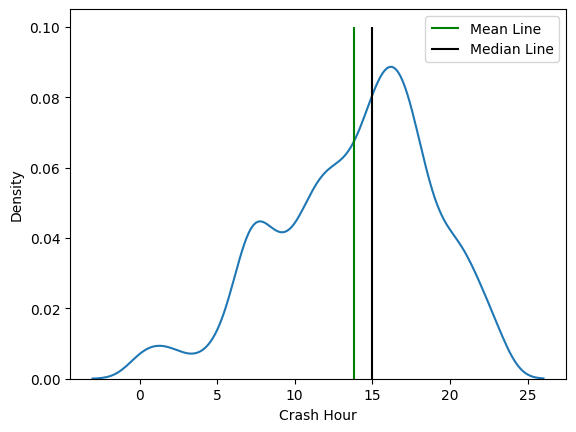

In [76]:
# Extracting hour component of crash time, called Crash Hour
reg_test['Crash Hour'] = pd.to_datetime(reg_test['Crash Time'], format = '%H:%M:%S').dt.hour

# Plotting the kde plot of crash hour column
sns.kdeplot(reg_test['Crash Hour'])

# Plot mean and median
plt.vlines(reg_test['Crash Hour'].mean(), ymin = 0, ymax = 0.10, color = 'green', label = 'Mean Line')
plt.vlines(reg_test['Crash Hour'].median(), ymin = 0, ymax = 0.10, color = 'black', label = 'Median Line')
plt.legend()

In [77]:
# From kde plot - fillna in Crash Hour with median value
reg_test['Crash Hour'] = reg_test['Crash Hour'].fillna(reg_test['Crash Hour'].median())

In [78]:
# Mapping the hour component to the period of the day
# Mapping the crash hour to period of the day mapping
b = [0, 4, 8, 12, 16, 20, 24]
l = ['Late Night', 'Early Morning', 'Morning', 'Noon', 'Evening', 'Night']

# 0-4: 'Late Night'
# 4-8: 'Early Morning'
# 8-12: 'Morning'
# 12-16: 'Noon'
# 16-20: 'Evening'
# 20-24: 'Night'

# Map 'Crash Hour' to period of the day; resulting column is called 'Crash Period'
reg_test['Crash Period'] = pd.cut(reg_test['Crash Hour'], bins=b, labels=l, include_lowest=True)

In [79]:
# Drop Crash Time and Crash Hour columns
reg_test.drop(columns = ['Crash Time', 'Crash Hour'], axis=1, inplace=True)

In [80]:
# One hot encode Crash Period column
reg_test['Crash Period'].value_counts()

# One_hot encode
reg_test = pd.get_dummies(reg_test, columns = ['Crash Period'], dtype = 'int')

# Drop Crash Period_Night
reg_test = reg_test.drop(columns='Crash Period_Night', axis=1)

In [81]:
# Check reg_test
reg_test.head()

,Crash Severity,Day of Week,Manner of Collision,Speed Limit,Surface Condition,Surface Type,Surface Width,Weather Condition,Vehicle Body Style,Person Age,Person Alcohol Result,Person Drug Test Result,Person Ethnicity,Person Gender,Crash Period_Late Night,Crash Period_Early Morning,Crash Period_Morning,Crash Period_Noon,Crash Period_Evening
0,1,THURSDAY,ANGLE - BOTH GOING STRAIGHT,40,1 - DRY,No Data,No Data,1 - CLEAR,MC - MOTORCYCLE,34,No Data,97 - NOT APPLICABLE,H - HISPANIC,1 - MALE,0,0,0,1,0
1,0,NaN,SAME DIRECTION - BOTH GOING STRAIGHT-SIDESWIPE,70,1 - DRY,No Data,48,2 - CLOUDY,SV - SPORT UTILITY VEHICLE,49,No Data,97 - NOT APPLICABLE,W - WHITE,NaN,0,0,1,0,0
2,1,THURSDAY,ANGLE - BOTH GOING STRAIGHT,50,1 - DRY,No Data,76,1 - CLEAR,"P4 - PASSENGER CAR, 4-DOOR",NaN,No Data,97 - NOT APPLICABLE,H - HISPANIC,1 - MALE,0,0,0,0,1
3,0,WEDNESDAY,ANGLE - ONE STRAIGHT-ONE RIGHT TURN,50,1 - DRY,No Data,72,1 - CLEAR,"P4 - PASSENGER CAR, 4-DOOR",22,No Data,No Data,W - WHITE,2 - FEMALE,0,0,0,0,1
4,0,FRIDAY,SAME DIRECTION - BOTH GOING STRAIGHT-SIDESWIPE,45,1 - DRY,No Data,72,1 - CLEAR,"P4 - PASSENGER CAR, 4-DOOR",23,No Data,97 - NOT APPLICABLE,NaN,1 - MALE,0,0,0,0,1


#### Day of Week

In [82]:
# Dropping the column
reg_test.drop(columns='Day of Week', axis=1, inplace=True)

#### Manner of Collision

In [83]:
# Value Counts
reg_test['Manner of Collision'].value_counts()
# 34 unique values
# Grouping the same group: SAME DIRECTION, ANGLE, ONE MOTOR VEHICLE, OPPOSITE DIRECTION, ANGLE

Manner of Collision
SAME DIRECTION - ONE STRAIGHT-ONE STOPPED                     512
SAME DIRECTION - BOTH GOING STRAIGHT-SIDESWIPE                404
SAME DIRECTION - BOTH GOING STRAIGHT-REAR END                 392
ANGLE - BOTH GOING STRAIGHT                                   388
ONE MOTOR VEHICLE - GOING STRAIGHT                            325
OPPOSITE DIRECTION - ONE STRAIGHT-ONE LEFT TURN               288
ANGLE - ONE STRAIGHT-ONE LEFT TURN                            226
ANGLE - ONE STRAIGHT-ONE RIGHT TURN                           124
SAME DIRECTION - ONE STRAIGHT-ONE LEFT TURN                    76
SAME DIRECTION - ONE STRAIGHT-ONE RIGHT TURN                   49
SAME DIRECTION - BOTH RIGHT TURN                               38
ONE MOTOR VEHICLE - BACKING                                    38
ONE MOTOR VEHICLE - TURNING LEFT                               38
SAME DIRECTION - BOTH LEFT TURN                                27
OPPOSITE DIRECTION - BOTH GOING STRAIGHT                

In [84]:
# Finding the null values in the Manner of Collision column
sum(reg_test['Manner of Collision'].isna())

154

In [85]:
# Filling the null values with the most frequent occurence
reg_test['Manner of Collision'].fillna(reg_test['Manner of Collision'].mode()[0], inplace=True)
reg_test['Manner of Collision'].value_counts()

Manner of Collision
SAME DIRECTION - ONE STRAIGHT-ONE STOPPED                     666
SAME DIRECTION - BOTH GOING STRAIGHT-SIDESWIPE                404
SAME DIRECTION - BOTH GOING STRAIGHT-REAR END                 392
ANGLE - BOTH GOING STRAIGHT                                   388
ONE MOTOR VEHICLE - GOING STRAIGHT                            325
OPPOSITE DIRECTION - ONE STRAIGHT-ONE LEFT TURN               288
ANGLE - ONE STRAIGHT-ONE LEFT TURN                            226
ANGLE - ONE STRAIGHT-ONE RIGHT TURN                           124
SAME DIRECTION - ONE STRAIGHT-ONE LEFT TURN                    76
SAME DIRECTION - ONE STRAIGHT-ONE RIGHT TURN                   49
SAME DIRECTION - BOTH RIGHT TURN                               38
ONE MOTOR VEHICLE - BACKING                                    38
ONE MOTOR VEHICLE - TURNING LEFT                               38
SAME DIRECTION - BOTH LEFT TURN                                27
OPPOSITE DIRECTION - BOTH GOING STRAIGHT                

In [86]:
# Checking the null values again
reg_test['Manner of Collision'].isna().sum()

0

In [87]:
# Renaming reg_test before creating the supergroup
reg_test_2 = reg_test

# Creating supergroup: SAME DIRECTION, ANGLE, ONE MOTOR VEHICLE, OPPOSITE DIRECTION, ANGLE
# SAME DIRECTION
reg_test_2.loc[reg_test_2['Manner of Collision'].str.contains('SAME DIRECTION', case = False), 'Manner of Collision'] = 'Same Direction'

# ANGLE
reg_test_2.loc[reg_test_2['Manner of Collision'].str.contains('ANGLE', case=False), 'Manner of Collision'] = 'Angle'

# ONE MOTOR VEHICLE
reg_test_2.loc[reg_test_2['Manner of Collision'].str.contains('ONE MOTOR VEHICLE', case=False), 'Manner of Collision'] = 'One motor'

# OPPOSITE DIRECTION
reg_test_2.loc[reg_test_2['Manner of Collision'].str.contains('OPPOSITE DIRECTION', case=False), 'Manner of Collision'] = 'Opposite Direction'

# OTHER
reg_test_2.loc[reg_test_2['Manner of Collision'].str.contains('OTHER', case=False), 'Manner of Collision'] = 'Other'

In [88]:
# One Hot Encode reg_test_2['Manner of Collision']
reg_test_2 = pd.get_dummies(reg_test_2, columns = ['Manner of Collision'], dtype = "int")

# Drop the Mannner of Collision_Same Direction - regression
reg_test_2 = reg_test_2.drop('Manner of Collision_Same Direction', axis = 1)

In [89]:
reg_test_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Crash Severity                          3261 non-null   int64 
 1   Speed Limit                             3261 non-null   int64 
 2   Surface Condition                       3261 non-null   object
 3   Surface Type                            3261 non-null   object
 4   Surface Width                           3261 non-null   object
 5   Weather Condition                       3108 non-null   object
 6   Vehicle Body Style                      3104 non-null   object
 7   Person Age                              3094 non-null   object
 8   Person Alcohol Result                   3098 non-null   object
 9   Person Drug Test Result                 3116 non-null   object
 10  Person Ethnicity                        3080 non-null   object
 11  Pers

#### Speed Limit 

In [90]:
# Check for NA's
reg_test['Speed Limit'].isnull().sum()
# Speed Limit is good - int64 datatype, no NA's

reg_test['Speed Limit'].value_counts()

Speed Limit
 50    571
 45    569
 70    525
 40    381
 30    302
 35    294
 55    176
 60    130
-1     100
 25     72
 10     28
 65     27
 20     25
 15     24
 75     19
 5      18
Name: count, dtype: int64

Treat value of -1 in this column is considered as missing data and replace with median.

In [91]:
# Replace the values of -1 with np.nan
reg_test_2.loc[(reg_test_2['Speed Limit'] == -1), 'Speed Limit'] = np.nan

c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


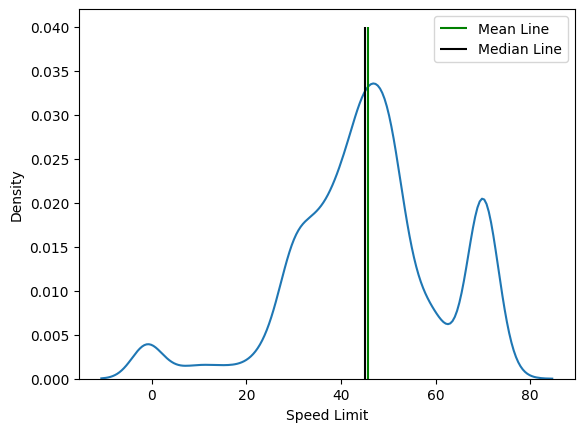

In [92]:
# plotting the kde of Speed Limit to determine appropriate method to fill missing data

# Plotting the kde of crash hour column
sns.kdeplot(reg_test['Speed Limit'])

# Plotting the mean and median of the Speed Limit
plt.vlines(reg_test['Speed Limit'].mean(), ymin = 0, ymax = 0.04, color = 'green', label = 'Mean Line')
plt.vlines(reg_test['Speed Limit'].median(), ymin = 0, ymax = 0.04, color = 'black', label = 'Median Line')
plt.legend()

In [93]:
# Fillna with median value
speedLimit_median = reg_test['Speed Limit'].median()
reg_test_2['Speed Limit'] = reg_test_2['Speed Limit'].fillna(speedLimit_median)

In [94]:
reg_test_2['Speed Limit'].value_counts()

Speed Limit
45.0    669
50.0    571
70.0    525
40.0    381
30.0    302
35.0    294
55.0    176
60.0    130
25.0     72
10.0     28
65.0     27
20.0     25
15.0     24
75.0     19
5.0      18
Name: count, dtype: int64

#### Surface Condition

In [95]:
reg_test['Surface Condition'].value_counts()

Surface Condition
1 - DRY                              3034
2 - WET                               212
99 - UNKNOWN                            7
3 - STANDING WATER                      5
98 - OTHER (EXPLAIN IN NARRATIVE)       2
7 - SAND, MUD, DIRT                     1
Name: count, dtype: int64

In [96]:
# Checking for NA's
reg_test_2['Surface Condition'].isnull().sum()
# No NA's

0

In [97]:
# Replacing the 98 - OTHER (EXPLAIN IN NARRATIVE) and 99 - UNKNOWN with 1 - DRY

# 98 - OTHER
reg_test_2.loc[reg_test_2['Surface Condition'].str.contains('98 - OTHER', case = False), 'Surface Condition'] = '1 - DRY'

# 99 - UNKNOWN
reg_test_2.loc[reg_test_2['Surface Condition'].str.contains('99 - UNKNOWN', case = False), 'Surface Condition'] = '1 - DRY'

In [98]:
# Replacing this with ordinal mapping
# 1 - DRY as 1 and other categories as 0
reg_test_2['Surface Condition'] = np.where(reg_test_2['Surface Condition'] == '1 - DRY', 1, 0)

#### Surface Type

In [99]:
# Drop column - No data
reg_test_2.drop(columns = 'Surface Type', axis = 1, inplace = True)

#### Surface Width

In [100]:
# Drop the column surface width - high number of NA's
reg_test_2.drop(columns = 'Surface Width', axis = 1, inplace = True)

#### Weather Condition

In [101]:
reg_test_2['Weather Condition'].value_counts()

Weather Condition
1 - CLEAR                            2636
2 - CLOUDY                            321
3 - RAIN                              142
99 - UNKNOWN                            7
98 - OTHER (EXPLAIN IN NARRATIVE)       1
6 - FOG                                 1
Name: count, dtype: int64

In [102]:
# Sum NA's
reg_test_2['Weather Condition'].isna().sum()
# 153 NA's

# Replace NA's with mode
weatherCondition_mode = reg_test_2['Weather Condition'].mode()[0]
reg_test_2['Weather Condition'] = reg_test_2['Weather Condition'].fillna(weatherCondition_mode)

In [103]:
reg_test_2['Weather Condition'].isna().sum()

0

In [104]:
# Replace 98 - OTHER (EXPLAIN IN NARRATIVE) and 99 - UNKNOWN with the most frequent
# 98 - OTHER
reg_test_2.loc[reg_test_2['Weather Condition'].str.contains('98 - OTHER', case = False), 'Weather Condition'] = '1 - CLEAR'

# 99 - UNKNOWN
reg_test_2.loc[reg_test_2['Weather Condition'].str.contains('99 - UNKNOWN', case = False), 'Weather Condition'] = '1 - CLEAR'

In [105]:
reg_test_2['Weather Condition'].value_counts()

Weather Condition
1 - CLEAR     2797
2 - CLOUDY     321
3 - RAIN       142
6 - FOG          1
Name: count, dtype: int64

In [106]:
# Mapping the weather into CLEAR, CLOUDY and RAIN/FOG
weather_dict = {'1 - CLEAR': 0,
                '2 - CLOUDY': 1,
                '3 - RAIN': 2,
                '6 - FOG': 2}

# Applying the mapping dictionary
reg_test_2['Weather Condition'] = reg_test_2['Weather Condition'].map(weather_dict)

#### Vehicle Body Style

In [107]:
# For now, dropping the column Vehicle Body Style
reg_test_2.drop(columns = ['Vehicle Body Style'], axis = 1, inplace = True)

In [108]:
reg_test_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Crash Severity                          3261 non-null   int64  
 1   Speed Limit                             3261 non-null   float64
 2   Surface Condition                       3261 non-null   int32  
 3   Weather Condition                       3261 non-null   int64  
 4   Person Age                              3094 non-null   object 
 5   Person Alcohol Result                   3098 non-null   object 
 6   Person Drug Test Result                 3116 non-null   object 
 7   Person Ethnicity                        3080 non-null   object 
 8   Person Gender                           3098 non-null   object 
 9   Crash Period_Late Night                 3261 non-null   int32  
 10  Crash Period_Early Morning              3261 non-null   int3

#### Person Age

In [109]:
# drop
reg_test_2.drop(columns = ['Person Age'], axis = 1, inplace = True)

#### Person Alcohol Result

In [110]:
# Counting the null values
reg_test_2['Person Alcohol Result'].isna().sum()
# 163 NA's

# Counting the unique values
reg_test_2['Person Alcohol Result'].value_counts()
# 3,089 No Data (95% of data)

Person Alcohol Result
No Data         3089
1 - POSITIVE       6
2 - NEGATIVE       3
Name: count, dtype: int64

In [111]:
# Use a np.where and assign No Data/Negative as 1 and 1 - Positive as 0
# This is because a positive alcohol test result is highly likely to impact the seriousness of the accident and hence, the 
# length of time it takes to clear the site.
reg_test_2['Person Alcohol Result'] = np.where(reg_test_2['Person Alcohol Result'] == '1 - POSITIVE', 0,1)

#### Person Drug Test Result

In [112]:
# Drop Column - ['Person Drug Test Result']
reg_test_2.drop(columns = 'Person Drug Test Result', axis = 1, inplace = True)

#### Person Ethnicity

In [113]:
# NA's
reg_test_2['Person Ethnicity'].isna().sum()
# 181 NA's

# Value Counts
reg_test_2['Person Ethnicity'].value_counts()

Person Ethnicity
W - WHITE                          1480
H - HISPANIC                        644
B - BLACK                           458
A - ASIAN                           262
99 - UNKNOWN                        161
No Data                              29
I - AMER. INDIAN/ALASKAN NATIVE      25
98 - OTHER                           21
Name: count, dtype: int64

In [114]:
# Fill NA with Others
reg_test_2['Person Ethnicity'] = reg_test_2['Person Ethnicity'].fillna('White')

In [115]:
# Creating supergroup: SAME DIRECTION, ANGLE, ONE MOTOR VEHICLE, OPPOSITE DIRECTION, ANGLE
# W - WHITE
reg_test_2.loc[reg_test_2['Person Ethnicity'].str.contains('W - WHITE', case = False), 'Person Ethnicity'] = 'White'

# H - HISPANIC
reg_test_2.loc[reg_test_2['Person Ethnicity'].str.contains('H - HISPANIC', case = False), 'Person Ethnicity'] = 'Hispanic'

# B - BLACK
reg_test_2.loc[reg_test_2['Person Ethnicity'].str.contains('B - BLACK', case = False), 'Person Ethnicity'] = 'Black'

# A - ASIAN
reg_test_2.loc[reg_test_2['Person Ethnicity'].str.contains('A - ASIAN', case = False), 'Person Ethnicity'] = 'Others'

# 99 - UNKNOWN
reg_test_2.loc[reg_test_2['Person Ethnicity'].str.contains('99 - UNKNOWN', case = False), 'Person Ethnicity'] = 'White'

# I - AMER. INDIAN/ALASKAN NATIVE 
reg_test_2.loc[reg_test_2['Person Ethnicity'].str.contains('I - AMER. INDIAN/ALASKAN NATIVE', case = False), 'Person Ethnicity'] = 'Others'

# 98 - OTHER
reg_test_2.loc[reg_test_2['Person Ethnicity'].str.contains('98 - OTHER', case = False), 'Person Ethnicity'] = 'White'

# No Data 
reg_test_2.loc[reg_test_2['Person Ethnicity'].str.contains('No Data', case = False), 'Person Ethnicity'] = 'Others'

In [116]:
# One hot encode 'Person Ethnicity' column
reg_test_2 = pd.get_dummies(reg_test_2, columns = ['Person Ethnicity'], dtype= 'int')

# Drop Person Ethnicity_Others - regression
reg_test_2 = reg_test_2.drop(columns = 'Person Ethnicity_Others', axis = 1)

#### Person Gender

In [117]:
# NA's
reg_test_2['Person Gender'].isna().sum()
# 163 NA's

# Value Counts
reg_test_2['Person Gender'].value_counts()
# 1 - MALE        1640
# 2 - FEMALE      1324
# 99 - UNKNOWN     134

Person Gender
1 - MALE        1640
2 - FEMALE      1324
99 - UNKNOWN     134
Name: count, dtype: int64

In [118]:
# Fill NA with Male
reg_test_2['Person Gender'] = reg_test_2['Person Gender'].fillna('Male')

# 99 - UNKNOWN
reg_test_2.loc[reg_test_2['Person Gender'].str.contains('1 - MALE', case = False), 'Person Gender'] = 'Male'

# 99 - UNKNOWN
reg_test_2.loc[reg_test_2['Person Gender'].str.contains('2 - FEMALE', case = False), 'Person Gender'] = 'Female'

# 99 - UNKNOWN
reg_test_2.loc[reg_test_2['Person Gender'].str.contains('99 - UNKNOWN', case = False), 'Person Gender'] = 'Male'

In [119]:
reg_test_2['Person Gender'].value_counts()

Person Gender
Male      1937
Female    1324
Name: count, dtype: int64

In [120]:
reg_test_2['Person Gender'] = np.where(reg_test_2['Person Gender'] == 'Male', 1,0)

In [121]:
# Renaming clean data
reg_test_clean = reg_test_2

#### Data Scaling

For scaling, we use the StandardScaler. This centers the feature columns to mean 0 with standard deviation 1 so that the feature columns take the form of a normal distribution, which makes it easier for ML linear models to learn weights. Furthermore, standardization maintains useful information about outliers and makes the algorithm less sensitive to them in contrast to min-max scaling, which scales the data to a limited range of values.

In [122]:
# import library
from sklearn.preprocessing import StandardScaler

Training Data

In [123]:
scaler = StandardScaler() # model instantiation
scaler.fit(X_train_clean)
X_train_scaled = scaler.transform(X_train_clean)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train_clean.columns)

In [124]:
X_train_scaled.describe()
X_train_scaled.head()

,Crash Severity,Speed Limit,Surface Condition,Weather Condition,Person Alcohol Result,Person Gender,Crash Period_Late Night,Crash Period_Early Morning,Crash Period_Morning,Crash Period_Noon,Crash Period_Evening,Manner of Collision_Angle,Manner of Collision_One motor,Manner of Collision_Opposite Direction,Manner of Collision_Other,Person Ethnicity_Black,Person Ethnicity_Hispanic,Person Ethnicity_White
0,-0.608563,-0.531412,0.267854,-0.363932,0.042939,0.790215,-0.197168,-0.361872,-0.448509,1.289596,-0.535115,-0.575786,-0.398094,2.615693,-0.106037,-0.402864,-0.493257,0.844654
1,-0.608563,1.634482,0.267854,-0.363932,0.042939,-1.265479,-0.197168,-0.361872,-0.448509,1.289596,-0.535115,-0.575786,2.511967,-0.382308,-0.106037,-0.402864,-0.493257,0.844654
2,0.574366,0.190553,0.267854,1.758627,0.042939,-1.265479,-0.197168,-0.361872,-0.448509,1.289596,-0.535115,-0.575786,-0.398094,-0.382308,-0.106037,-0.402864,-0.493257,0.844654
3,-0.608563,0.190553,0.267854,-0.363932,0.042939,-1.265479,-0.197168,2.763408,-0.448509,-0.775436,-0.535115,-0.575786,-0.398094,-0.382308,-0.106037,2.482227,-0.493257,-1.183916
4,-0.608563,-0.531412,0.267854,-0.363932,0.042939,0.790215,-0.197168,-0.361872,-0.448509,-0.775436,1.868756,-0.575786,-0.398094,-0.382308,-0.106037,-0.402864,-0.493257,0.844654


In [125]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13041 entries, 0 to 13040
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Crash Severity                          13041 non-null  float64
 1   Speed Limit                             13041 non-null  float64
 2   Surface Condition                       13041 non-null  float64
 3   Weather Condition                       13041 non-null  float64
 4   Person Alcohol Result                   13041 non-null  float64
 5   Person Gender                           13041 non-null  float64
 6   Crash Period_Late Night                 13041 non-null  float64
 7   Crash Period_Early Morning              13041 non-null  float64
 8   Crash Period_Morning                    13041 non-null  float64
 9   Crash Period_Noon                       13041 non-null  float64
 10  Crash Period_Evening                    13041 non-null  fl

Testing Data

In [126]:
reg_test_scaled = scaler.transform(reg_test_clean)
reg_test_scaled = pd.DataFrame(reg_test_scaled, columns = reg_test_clean.columns)

In [127]:
reg_test_scaled.describe()
reg_test_scaled.head()

,Crash Severity,Speed Limit,Surface Condition,Weather Condition,Person Alcohol Result,Person Gender,Crash Period_Late Night,Crash Period_Early Morning,Crash Period_Morning,Crash Period_Noon,Crash Period_Evening,Manner of Collision_Angle,Manner of Collision_One motor,Manner of Collision_Opposite Direction,Manner of Collision_Other,Person Ethnicity_Black,Person Ethnicity_Hispanic,Person Ethnicity_White
0,0.574366,-0.531412,0.267854,-0.363932,0.042939,0.790215,-0.197168,-0.361872,-0.448509,1.289596,-0.535115,1.736756,-0.398094,-0.382308,-0.106037,-0.402864,2.027341,-1.183916
1,-0.608563,1.634482,0.267854,1.758627,0.042939,0.790215,-0.197168,-0.361872,2.229608,-0.775436,-0.535115,-0.575786,-0.398094,-0.382308,-0.106037,-0.402864,-0.493257,0.844654
2,0.574366,0.190553,0.267854,-0.363932,0.042939,0.790215,-0.197168,-0.361872,-0.448509,-0.775436,1.868756,1.736756,-0.398094,-0.382308,-0.106037,-0.402864,2.027341,-1.183916
3,-0.608563,0.190553,0.267854,-0.363932,0.042939,-1.265479,-0.197168,-0.361872,-0.448509,-0.775436,1.868756,1.736756,-0.398094,-0.382308,-0.106037,-0.402864,-0.493257,0.844654
4,-0.608563,-0.170429,0.267854,-0.363932,0.042939,0.790215,-0.197168,-0.361872,-0.448509,-0.775436,1.868756,-0.575786,-0.398094,-0.382308,-0.106037,-0.402864,-0.493257,0.844654


In [128]:
reg_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Crash Severity                          3261 non-null   float64
 1   Speed Limit                             3261 non-null   float64
 2   Surface Condition                       3261 non-null   float64
 3   Weather Condition                       3261 non-null   float64
 4   Person Alcohol Result                   3261 non-null   float64
 5   Person Gender                           3261 non-null   float64
 6   Crash Period_Late Night                 3261 non-null   float64
 7   Crash Period_Early Morning              3261 non-null   float64
 8   Crash Period_Morning                    3261 non-null   float64
 9   Crash Period_Noon                       3261 non-null   float64
 10  Crash Period_Evening                    3261 non-null   floa

### Clustering

Here, we apply the clustering methods learned in class to study the structure of the data. Through this, we hope to see how the defined feature columns relates to each other and possible patterns that might come out.

#### Agglomerative Clustering

In [129]:
# import library
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

To find the optimal number of clusters, we use the Silhoutte Score metric.

In [130]:
# run a for-loop to find optimal cluster - Agglomerative Clsutering
# using silhoutte score

n_clus_agg = []
ss_score_agg = []
max_clus_agg = 20

for i in range(2,(max_clus_agg + 1)):
# for i in range(max_iter, len(X_scaled)):
    # instantiate model
    agg_cluster = AgglomerativeClustering(n_clusters = i, linkage = 'ward')

    # Train the clustering model on the feature set
    agg_cluster.fit(X_train_scaled)

    # silhouette_score
    labels = agg_cluster.labels_
    ss = metrics.silhouette_score(X_train_scaled, labels, metric='euclidean')
    
    # store result in list
    n_clus_agg.append(i)
    ss_score_agg.append(ss)
    
# create ss_dict
ss_dict_agg = {n_clus_agg[i]: ss_score_agg[i] for i in range(len(n_clus_agg))}

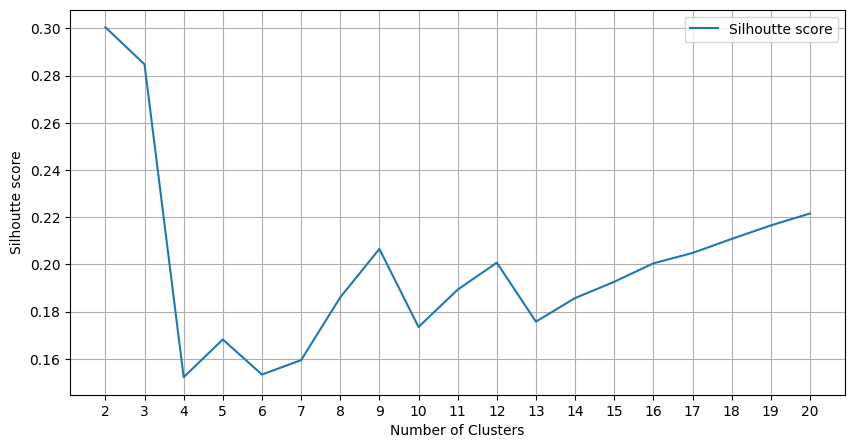

In [131]:
# plot 

%matplotlib inline

plt.subplots(figsize = (10,5))
plt.plot(n_clus_agg, ss_score_agg, label = 'Silhoutte score')
plt.xticks(n_clus_agg)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte score')
plt.legend()
plt.grid()

In [132]:
# return top 3 number of cluster by silhoutte score
ss_dict_agg_df = pd.DataFrame({'cluster': n_clus_agg, 'sil_score_agg': ss_score_agg})
ss_dict_agg_df.sort_values(by = 'sil_score_agg', ascending= False).head(3)

,cluster,sil_score_agg
0,2,0.300467
1,3,0.284733
18,20,0.221544


The top 3 number of clusters by silhoutte score are listed below:
Number of clusters: 2; silhoutte score: 0.300
Number of clusters: 4; silhoutte score: 0.285
Number of clusters: 3; silhoutte score: 0.222

We chose the number of cluster with the highest Silhoutte score which is 2.

Apply Agglomerative Clustering with optimal number of cluster

In [133]:
# clustering
model = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')

# Train the model
model = model.fit(X_train_scaled)

In [134]:
# The number of clusters found by the algorithm.
model.n_clusters_

2

In [135]:
# Cluster labels for each point.
model.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [136]:
# Define the number of data in each cluster

clu = []
clu_num = []

for i in range(model.n_clusters_):
    # Number of data in each cluster.
    clu_size = model.labels_[model.labels_ == i].size
    clu.append(i)
    clu_num.append(clu_size)
    
# create clu_num_dict
clu_num_dict = {clu[i]: clu_num[i] for i in range(len(clu))}
clu_num_dict

{0: 1298, 1: 11743}

We have 1298 instances in cluster 0 and 11743 instances in cluster 1

Explore individual clusters - AgglomerativeClustering

In [137]:
# Attach cluster label to inverse transformed X_train_scaled
# to thoroughly explore the contents of each cluster

X_train_cluster = X_train_clean.copy()
X_train_cluster['clusters'] = model.labels_

In [138]:
# examine X_train_cluster 
X_train_cluster.head()

,Crash Severity,Speed Limit,Surface Condition,Weather Condition,Person Alcohol Result,Person Gender,Crash Period_Late Night,Crash Period_Early Morning,Crash Period_Morning,Crash Period_Noon,Crash Period_Evening,Manner of Collision_Angle,Manner of Collision_One motor,Manner of Collision_Opposite Direction,Manner of Collision_Other,Person Ethnicity_Black,Person Ethnicity_Hispanic,Person Ethnicity_White,clusters
0,0,40.0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,1
1,0,70.0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1
2,1,50.0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1
3,0,50.0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4,0,40.0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1


Explore the instances in cluster 0 and cluster 1

In [139]:
# extract cluster 0
X_train_cluster_0 = X_train_cluster[X_train_cluster['clusters'] == 0]

# extract cluster 1
X_train_cluster_1 = X_train_cluster[X_train_cluster['clusters'] == 1]

Average Speed Limit

In [140]:
# Average Speed Limit
# cluster 0
X_train_cluster_0['Speed Limit'].mean()
# Average Spped Limit in cluster 0 is 52.79

# cluster 1
X_train_cluster_1['Speed Limit'].mean()
# Average Spped Limit in cluster 1 is 46.76

46.7606233500809

Cluster 0 have higher average Speed Limit compared to Cluster 1.

Crash Severity

In [141]:
# Crash Severity
# cluster 0
X_train_cluster_0['Crash Severity'].value_counts()/X_train_cluster['Crash Severity'].value_counts()

Crash Severity
0    0.097728
1    0.118081
2    0.088125
3    0.096774
4    0.175000
Name: count, dtype: float64

In [142]:
# cluster 1
X_train_cluster_1['Crash Severity'].value_counts()/X_train_cluster['Crash Severity'].value_counts()

Crash Severity
0    0.902272
1    0.881919
2    0.911875
3    0.903226
4    0.825000
Name: count, dtype: float64

The two clusters contains instances of the different crash severity in our dataset. However, we observe that cluster 0 have slightly higher instances of fatal injury (labelled 4) compared to other types of severity. 

Surface Condition

In [143]:
# Surface Condition
# cluster 0
X_train_cluster_0['Surface Condition'].value_counts()

Surface Condition
0    871
1    427
Name: count, dtype: int64

In [144]:
# cluster 1
X_train_cluster_1['Surface Condition'].value_counts()

Surface Condition
1    11741
0        2
Name: count, dtype: int64

Cluster 0 has majority (871) of the instances with Surface Condition as 0, with cluster 1 only having 2 instances. Surface condition of 0 means the surface was not dry, while 1 represent dry surfaces. With this observation, it would be interesting to check the distribution of the weather condition in cluster 0.

In [145]:
# Weather Condition
# cluster 0
X_train_cluster_0['Weather Condition'].value_counts()/X_train_cluster['Weather Condition'].value_counts()

Weather Condition
0    0.052534
1    0.161642
2    0.978887
Name: count, dtype: float64

From above, we see cluster 0 contains approx. 98% of instances where weather condition is 2. These are instances where weather condition indicates rain or fog and this agrees with what we saw before that cluster 0 has majority of the instances where the surface condition was not dry.

We have also seen earlier that cluster 0 have slightly higher instances of fatal crash severity and can explore a bit more on the weather and surface conditions when the crah severity is fatal in cluster 0.

In [146]:
X_train_cluster_0[X_train_cluster_0['Crash Severity'] == 4]['Weather Condition'].value_counts()

Weather Condition
0    6
1    1
Name: count, dtype: int64

In [147]:
X_train_cluster_0[X_train_cluster_0['Crash Severity'] == 4]['Surface Condition'].value_counts()

Surface Condition
1    7
Name: count, dtype: int64

From above, we see that all the fatal crash severity in cluster 0 occured when the surface condition was dry. 6 of the 7 cases also occured when the Weather Condition was clear, with only 1 occuring when the condition was cloudy.

We repeat the same analysis for cluster 1.

In [148]:
X_train_cluster_1[X_train_cluster_1['Crash Severity'] == 4]['Weather Condition'].value_counts()

Weather Condition
0    32
1     1
Name: count, dtype: int64

In [149]:
X_train_cluster_1[X_train_cluster_1['Crash Severity'] == 4]['Surface Condition'].value_counts()

Surface Condition
1    33
Name: count, dtype: int64

We see similar occurence in cluster 1. All the fatal crash severity occured when the surface condition was dry. 32 of the 33 cases also occured when the Weather Condition was clear, with only 1 occuring when the condition was cloudy.

From this analysis, we can say that we do not find a relationship between fatal crash severity and unclear weather condition and/or wet surface condition.

Person Gender

In [150]:
# Person Gender
# Male: 1
X_train_cluster[X_train_cluster['Person Gender'] == 1]['clusters'].value_counts()

clusters
1    7160
0     868
Name: count, dtype: int64

In [151]:
# Female
X_train_cluster[X_train_cluster['Person Gender'] == 0]['clusters'].value_counts()

clusters
1    4583
0     430
Name: count, dtype: int64

We see that there are instances of Male and Female gender in both clusters. 

So far, we have explored the clusters generated with AgglomerativeClustering algorithm and found some insights. Next, we use the KMeans Clustering algorithm.

#### KMeans Clustering

In [152]:
# import library
from sklearn import metrics
from sklearn.cluster import KMeans

In [153]:
# run a for-loop to find optimal cluster - KMeans Clsutering
# using silhoutte score

n_clus_kmeans = []
ss_score_kmeans = []
max_clus_kmeans = 20

for i in range(2,(max_clus_kmeans + 1)):
# for i in range(max_iter, len(X_scaled)):
    # instantiate model
    kmeans_cluster = KMeans(n_clusters = i,  random_state = 0, n_init='auto')

    # Train the clustering model on the feature set
    kmeans_cluster.fit(X_train_scaled)

    # silhouette_score
    labels = kmeans_cluster.labels_
    ss = metrics.silhouette_score(X_train_scaled, labels, metric='euclidean')
    
    # store result in list
    n_clus_kmeans.append(i)
    ss_score_kmeans.append(ss)
    
# create ss_dict
ss_dict_kmeans = {n_clus_kmeans[i]: ss_score_kmeans[i] for i in range(len(n_clus_kmeans))}

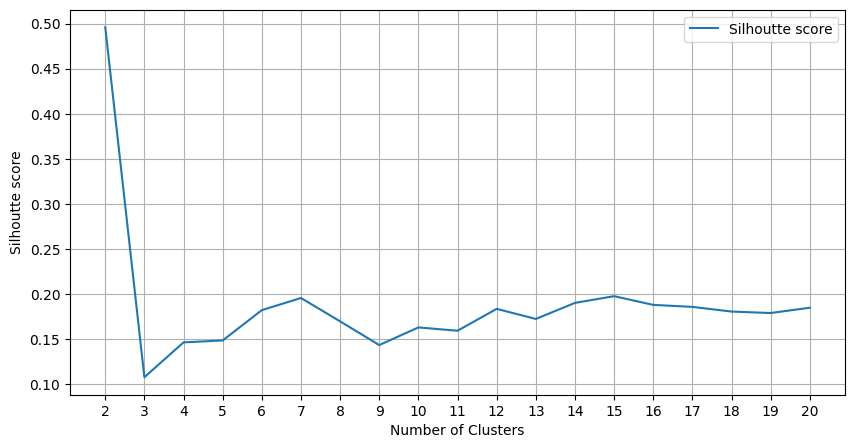

In [154]:
# plot 

%matplotlib inline

plt.subplots(figsize = (10,5))
plt.plot(n_clus_kmeans, ss_score_kmeans, label = 'Silhoutte score')
plt.xticks(n_clus_kmeans)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte score')
plt.legend()
plt.grid()

In [155]:
# return top 3 number of cluster by silhoutte score
ss_dict_kmeans_df = pd.DataFrame({'cluster': n_clus_kmeans, 'sil_score_kmeans': ss_score_kmeans})
ss_dict_kmeans_df.sort_values(by = 'sil_score_kmeans', ascending= False).head(3)

,cluster,sil_score_kmeans
0,2,0.495957
13,15,0.197754
5,7,0.195741


Using KMeans clustering algorithm, the optimal number of clusters by silhoutte score is also 2. 

Apply KMeans Clustering with optimal number of clusters

In [156]:
# clustering
model_kmeans = KMeans(n_clusters = 2,  random_state = 0, n_init='auto')

# Train the model
model_kmeans = model_kmeans.fit(X_train_scaled)

In [157]:
# Define the number of data in each cluster

clu = []
clu_num = []

for i in range(2):
    # Number of data in each cluster.
    clu_size = model_kmeans.labels_[model_kmeans.labels_ == i].size
    clu.append(i)
    clu_num.append(clu_size)
    
# create clu_num_dict
clu_num_dict = {clu[i]: clu_num[i] for i in range(len(clu))}
clu_num_dict

{0: 12896, 1: 145}

We have 12896 instances in Cluster 0 and 145 in cluster 1.

Explore clusters - KMeans

In [158]:
# Attach cluster label to X_train_clean 
# to thoroughly explore the contents of each cluster

X_train_cluster_k = X_train_clean.copy()
X_train_cluster_k['k_clusters'] = model_kmeans.labels_

In [159]:
# examine X_train_cluster 
X_train_cluster_k.head()

,Crash Severity,Speed Limit,Surface Condition,Weather Condition,Person Alcohol Result,Person Gender,Crash Period_Late Night,Crash Period_Early Morning,Crash Period_Morning,Crash Period_Noon,Crash Period_Evening,Manner of Collision_Angle,Manner of Collision_One motor,Manner of Collision_Opposite Direction,Manner of Collision_Other,Person Ethnicity_Black,Person Ethnicity_Hispanic,Person Ethnicity_White,k_clusters
0,0,40.0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0
1,0,70.0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2,1,50.0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,0,50.0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,40.0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0


In [160]:
# extract cluster 0
X_train_cluster_k0 = X_train_cluster_k[X_train_cluster_k['k_clusters'] == 0]

# extract cluster 1
X_train_cluster_k1 = X_train_cluster_k[X_train_cluster_k['k_clusters'] == 1]

Crash Severity

In [161]:
# Cluster 0
X_train_cluster_k0['Crash Severity'].value_counts()

Crash Severity
0    8801
1    1896
2    1856
3     310
4      33
Name: count, dtype: int64

In [162]:
# Cluster 1
X_train_cluster_k1['Crash Severity'].value_counts()

Crash Severity
0    132
4      7
2      5
1      1
Name: count, dtype: int64

Both clusters include the different instances of crash severity.

Surface Condition

In [163]:
# Surface Condition
# cluster 0
X_train_cluster_k0['Surface Condition'].value_counts()

Surface Condition
1    12025
0      871
Name: count, dtype: int64

In [164]:
# cluster 1
X_train_cluster_k1['Surface Condition'].value_counts()

Surface Condition
1    143
0      2
Name: count, dtype: int64

From above, we see that both clusters include the different instances of surface conditions - dry and not dry. Cluster 1, however, mainly contain dry surface condition.

Weather Condition

In [165]:
# cluster 0
X_train_cluster_k0['Weather Condition'].value_counts()

Weather Condition
0    11187
1     1189
2      520
Name: count, dtype: int64

In [166]:
# cluster 1
X_train_cluster_k1['Weather Condition'].value_counts()

Weather Condition
0    139
1      5
2      1
Name: count, dtype: int64

From above, we see that both clusters include the different instances of weather conditions - clear, cloudy and rain/fog. Cluster 1, however, mainly contain dry surface condition.

Person Ethnicity_Black

In [167]:
X_train_cluster[X_train_cluster['Person Ethnicity_Black'] == 1]['clusters'].value_counts()

clusters
1    1619
0     202
Name: count, dtype: int64

Person Ethnicity_Hispanic

In [168]:
X_train_cluster[X_train_cluster['Person Ethnicity_Hispanic'] == 1]['clusters'].value_counts()

clusters
1    2259
0     293
Name: count, dtype: int64

Person Ethnicity_White

In [169]:
X_train_cluster[X_train_cluster['Person Ethnicity_White'] == 1]['clusters'].value_counts()

clusters
1    6905
0     706
Name: count, dtype: int64

Each of the clusters contains instances of the different ethnicity

Crash Period_Late Night

In [170]:
X_train_cluster[X_train_cluster['Crash Period_Late Night'] == 1]['clusters'].value_counts()

clusters
0    487
1      1
Name: count, dtype: int64

The bulk of the Crash Period_Late Night is clustered into cluster 0

Having explored the Regression dataset a bit which have helped us observe some patterns, we proceed to Regression model training.

### Regression model training

In [171]:
# define feature and target set
X_train_reg = X_train_scaled
X_train_reg

y_train_reg = y_train

#### Statistical Learning - OLS model

Before training a Multiple Linear Regression (MLR) model on our dataset, we need to validate the different key assumptions that the statistical MLR model depends on. These includes the assumptions of linearity, independence and normality of errors, and equal variance. Prior to this, we also need to check for multi-collinearity in our dataset. 

1. Multi-collinearity check

Multicollinearity occurs when two or more predictor variables in a regression model are strongly and linearly related to each other. For our dataset, we would use a correlation coefficient threshold of 0.8 in absolute value between two or more predictors. Predictors having above this value is interpreted as being multicollinear and only the first predictor would be kept.

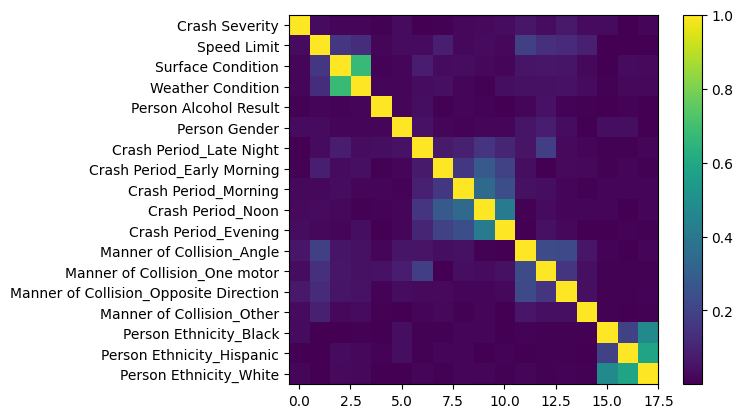

In [172]:
# return correlation matrix
corr_matrix = np.corrcoef(X_train_reg.T)
corr_matrix

# plot corr_matrix

%matplotlib inline

plt.imshow(np.abs(corr_matrix))
plt.colorbar()
plt.yticks(range(X_train_reg.shape[1]), X_train_reg.columns)
plt.show()

We further explore if any of the columns meet our correlation coeffienct threshold of 0.80 using a masked DataFrame.

In [173]:
# convert corr_matrix to df
corr_df = pd.DataFrame(corr_matrix, columns=X_train_reg.columns, index= X_train_reg.columns)

# subset for values of corrcoef >= 0.80 or =< -0.80
corr_df_high = corr_df[abs(corr_df[:]) >= 0.80]

In [174]:
corr_df_high

,Crash Severity,Speed Limit,Surface Condition,Weather Condition,Person Alcohol Result,Person Gender,Crash Period_Late Night,Crash Period_Early Morning,Crash Period_Morning,Crash Period_Noon,Crash Period_Evening,Manner of Collision_Angle,Manner of Collision_One motor,Manner of Collision_Opposite Direction,Manner of Collision_Other,Person Ethnicity_Black,Person Ethnicity_Hispanic,Person Ethnicity_White
Crash Severity,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Speed Limit,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surface Condition,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weather Condition,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Person Alcohol Result,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Person Gender,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crash Period_Late Night,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crash Period_Early Morning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crash Period_Morning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crash Period_Noon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From our results, we can say that none of the predictor variables are multicollinear at our correlation coefficient threshold of 0.8.

2. Linearity

For a MLR model to be appropriate, the relationship between the independent variable (predictor) and the dependent variable (response) should be linear. This means that changes in the predictor variable are associated with constant changes in the response variable. We check this assumption by plotting the predicted values (fitted values) against the residuals and checking if the points are randomly distributed and show no pattern.

In [175]:
import statsmodels.api as sm

X = sm.add_constant(X_train_reg)

model = sm.OLS(y_train_reg, X).fit()

In [176]:
y_predict = model.predict(X)
error = y_train_reg - y_predict

In [177]:
# Data frame with two columns of y_predict and error
lin = pd.DataFrame(y_predict, columns= ['y_predict'])
lin['error'] = error

Text(0, 0.5, 'Residuals')

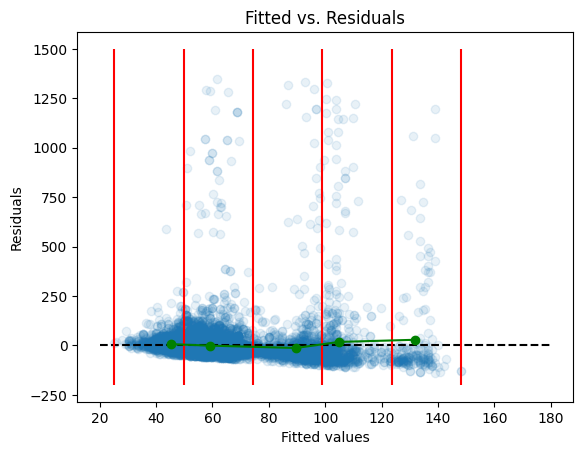

In [178]:
plt.scatter(lin['y_predict'], lin['error'], alpha = 0.1)
plt.hlines(0, xmin = 20, xmax = 180, linestyles= '--', color = 'k')

# divit the plot into 5 equal bands
vals = np.linspace(lin['y_predict'].min(), lin['y_predict'].max(), 6)
for i in range(6):
    plt.vlines(vals[i], ymin = -200, ymax = 1500, color = 'red')

# Find the mean of each band
band_mean = []
for i in range(5):
    lin_band = lin[(lin['y_predict'] >= vals[i]) & (lin['y_predict'] < vals[i+1])]
    band_mean.append([lin_band['y_predict'].mean(), lin_band['error'].mean()])

plt.plot(np.array(band_mean)[:,0], np.array(band_mean)[:,1], 'o-', color = 'g')

plt.title('Fitted vs. Residuals')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

Based on the plot above, we observe no significant deviations from a horizontal line, except for a minor expected amount of "noise." This suggests a linear relationship between the dependent and independent variables. Additionally, the plot indicates that the mean of the errors is nearly zero.

3. Independence of Errors

We look at the previously presented fitted vs. residual plot above. As there are no discernible systematic patterns like curves or waves in the plot, we can suggest that the assumption of independence of error is likely met.

4. Normality of Errors

To assess the normality assumption, we make use of two visualization methods that offer valuable insights into the distribution of residuals. These methods are a histogram of the residuals and a quantile-quantile (QQ) plot.

c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

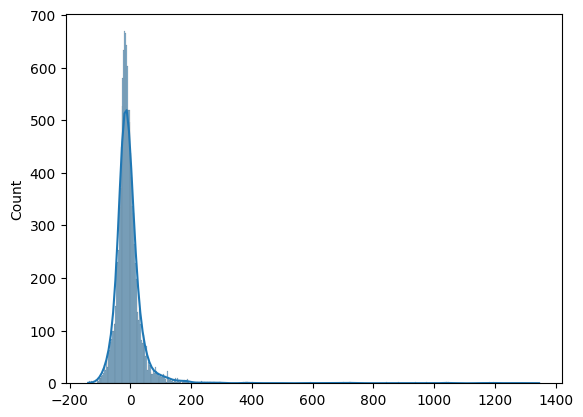

In [179]:
# Histogram of residuals

import seaborn as sns

sns.histplot(error, kde= True)

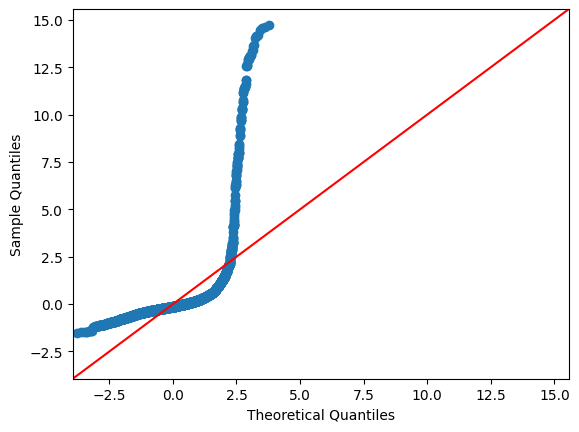

In [180]:
# Q-Q plot

import statsmodels.api as sm

sm.qqplot(error, line = '45', fit = True)
plt.show()

The Histogram and Q-Q plot clearly shows that the error data does not follow a normal distribution. Instead, the histogram shows that it is strongly rightly skewed. This suggest that there are outliers in our target variable, y, and there is a need to transfrom the target variable.

Transforming the target variable, y_train_reg

Before transformation, we confirm the presence of outliers in the target variable by printing the summary statistics as shown below. We also plot the boxplot.

In [181]:
# summary statistics: y_train_reg
y_train_reg.describe()

count    13041.000000
mean        63.669274
std         92.934701
min          0.000000
25%         35.000000
50%         48.000000
75%         65.000000
max       1427.000000
Name: y, dtype: float64

[Text(0, 0.5, 'y_train_reg')]

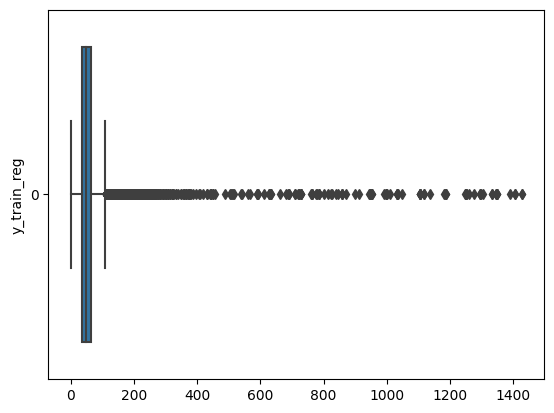

In [182]:
# boxplot y_train_reg 
sns.boxplot(y_train_reg, orient= 'h').set(
    ylabel='y_train_reg')

From the summary statistics and plot, we confirm the presence of outliers in our target set that postitively skew our data. We transform the target variable to correct for this.

To check the appropriate type of transformation for y_train_reg, we first check the summary statistics. From the statistics, we see that the minimum value of y_train_reg is 0. Since y_train_reg contains 0, a log or inverse transformation would not be appropriate. We thus perform a cube root transformation.

In [183]:
# add constant to feature set
X_2 = sm.add_constant(X_train_reg)

# transform y_train_reg
y_train_reg_t = np.cbrt(y_train_reg)

# fit model with transformed y_train_reg
model_2 = sm.OLS(y_train_reg_t, X_2).fit()

# return fitted values of y_train_reg
y_predict_2 = model_2.predict(X_2)

# compute error
error_2 = y_train_reg_t - y_predict_2

c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

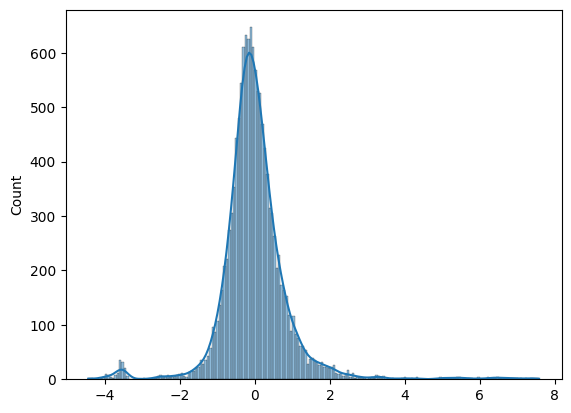

In [184]:
# histogram of residuals
sns.histplot(error_2, kde= True)

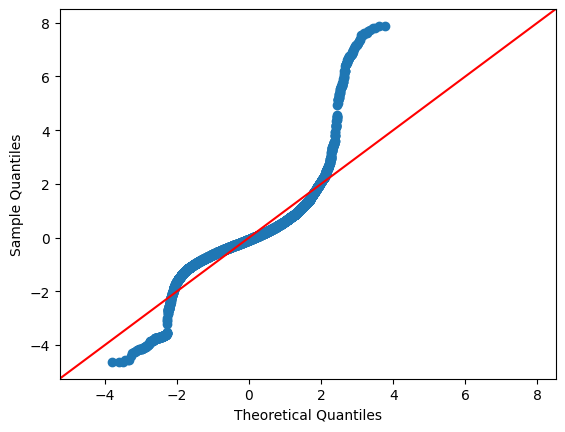

In [185]:
# Q-Q plot of residual

import statsmodels.api as sm

sm.qqplot(error_2, line = '45', fit = True)
plt.show()

The Q-Q plot still shows that the errors deviate from a normal distribution even after a cube root transformation. Other transformation were attmepted (square-root, fourth root, log (y_train_reg +1)) but none returned errors that are normally distributed. We thus opted to stay with a cube root transformation. 

4. Equal Variances (Homoscedasticity)

In [186]:
# Data frame with two columns of y_predict and error
lin_2 = pd.DataFrame(y_predict_2, columns= ['y_predict'])
lin_2['error'] = error_2

[[3.419814017326074, -0.386345344237653, 0.38843898442394154], [3.736648032960468, -0.3752410608705743, 0.3018908009117718], [4.053482048594862, -0.5816132159992935, 0.28774525369675974], [4.3703160642292564, -0.79123629586232, 0.5476585092338957], [4.687150079863651, -0.7677284827570041, 0.5595346083498969]]


Text(0, 0.5, 'Residuals')

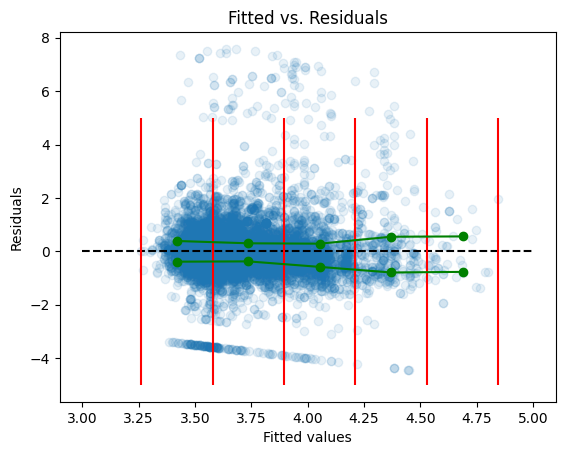

In [187]:
plt.scatter(lin_2['y_predict'], lin_2['error'], alpha = 0.1)
plt.hlines(0, xmin = 3, xmax = 5.0, linestyles= '--', color = 'k')

# divit the plot into 5 equal bands
vals = np.linspace(lin_2['y_predict'].min(), lin_2['y_predict'].max(), 6)
for i in range(6):
    plt.vlines(vals[i], ymin = -5, ymax = 5, color = 'red')

# Find the mean of each band
band_quantile = []
for i in range(5):
    lin_band = lin_2[(lin_2['y_predict'] >= vals[i]) & (lin_2['y_predict'] < vals[i+1])]
    band_quantile.append([vals[i:i+2].mean(), lin_band['error'].quantile(0.25), lin_band['error'].quantile(0.75)])

print(band_quantile)
plt.plot(np.array(band_quantile)[:,0], np.array(band_quantile)[:,1], 'o-', color = 'g')
plt.plot(np.array(band_quantile)[:,0], np.array(band_quantile)[:,2], 'o-', color = 'g')

plt.title('Fitted vs. Residuals')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

The assumption of equal variance is met after the cube root transformation of the target variable.

Since most of the key assumptions of the statistical OLS model are now satisfied after a cube root transformation (except the normality of error), we move on to applying the OLS model.

Hypothesis Testing

In [188]:
# import libraries

# OLS regression model
import statsmodels.api as sm

In [189]:
# Apply OLS regression - multiple linear regression

# add constant
x = sm.add_constant(X_train_reg)

# transform y
y_train_reg_cbrt = np.cbrt(y_train_reg)

# train and fit model - transformed y
model = sm.OLS(y_train_reg_cbrt, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     33.66
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          3.20e-114
Time:                        13:40:53   Log-Likelihood:                -17996.
No. Observations:               13041   AIC:                         3.603e+04
Df Residuals:                   13022   BIC:                         3.617e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      3.7141      0.008    440.699      0.000       3.698       3.731
Crash Severity                             0.0941      0.009     11.020      0.000       0.077       0.111
Speed Limit                                0.0406      0.009      4.394      0.000       0.022       0.059
Surface Condition                          0.0328      0.012      2.838      0.005       0.010       0.055
Weather Condition                          0.0084      0.011      0.736      0.462      -0.014       0.031
Person Alcohol Result                     -0.0194      0.008     -2.292      0.022      -0.036      -0.003
Person Gender                              0.0412      0.008      4.848      0.000       0.025       0.058
Crash Period_Late Night                    0.0526      0.010      5.208      0.000       0.033       0.072
Crash Period_Early Morning                -0.0390      0.012     -3.139      0.002      -0.063      -0.015
Crash Period_Morning                      -0.0811      0.014     -5.979      0.000      -0.108      -0.055
Crash Period_Noon                         -0.0576      0.016     -3.621      0.000      -0.089      -0.026
Crash Period_Evening                      -0.0472      0.014     -3.261      0.001      -0.076      -0.019
Manner of Collision_Angle                  0.0318      0.010      3.341      0.001       0.013       0.050
Manner of Collision_One motor              0.1348      0.009     14.302      0.000       0.116       0.153
Manner of Collision_Opposite Direction     0.0403      0.009      4.371      0.000       0.022       0.058
Manner of Collision_Other                  0.0226      0.009      2.643      0.008       0.006       0.039
Person Ethnicity_Black                    -0.0083      0.013     -0.646      0.519      -0.034       0.017
Person Ethnicity_Hispanic                 -0.0008      0.014     -0.056      0.955      -0.028       0.027
Person Ethnicity_White                     0.0004      0.016      0.027      0.978      -0.030       0.031
==============================================================================
Omnibus:                     5739.998   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           117418.416
Skew:                           1.620   Prob(JB):                         0.00
Kurtosis:                      17.338   Cond. No.                         4.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The OLS model is trained on the training dataset and returned a R-squared value of 0.045. This is the proportion of the variance in the dependent variable that is explained by the model. The low value of this indicate that the linear regression model could not explain significant proportion of the variance in the dataset and suggest that a linear regression model may not be appropriate for this dataset. 

The adjusted R-squared modifies the R-squared for the number of independent variables in the model. It returns a value of 0.043 for the model. 

The F-statistic returns the ratio of mean squared error of the model to the mean squared error of residuals. It determines the overall significance of the model. From the printed result, we see that the model is significant at a significant level of 0.05 [the Prob (F-statistic) is 2.09 * 10^-114]

We checked the significance of each of the independent variable that goes into the model and saw that Weather Condition, Person Ethnicity_Black, Person Ethnicity_Hispanic, Person Ethnicity_White are all not significant at an aplha value of 0.05. We thus dropped these variables and repeated the regression. 


Looking at the feature variables, the Weather Condition and Person Ethnicity_Asian variables are not significant at the alpha level of 0.05. We thus drop these columns and repeat the regression.

In [190]:
# drop Weather Condition, Person Ethnicity_Asian
X_train_reg_2 = X_train_reg.drop(['Weather Condition', 'Person Ethnicity_Black', 
                                  'Person Ethnicity_Hispanic', 'Person Ethnicity_White'], axis = 1)

# add constant
x = sm.add_constant(X_train_reg_2)

# train and fit model - transformed y
model = sm.OLS(y_train_reg_cbrt, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     43.18
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          4.10e-117
Time:                        13:40:53   Log-Likelihood:                -17996.
No. Observations:               13041   AIC:                         3.602e+04
Df Residuals:                   13026   BIC:                         3.613e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      3.7141      0.008    440.740      0.000       3.698       3.731
Crash Severity                             0.0938      0.009     10.997      0.000       0.077       0.111
Speed Limit                                0.0407      0.009      4.417      0.000       0.023       0.059
Surface Condition                          0.0271      0.009      3.159      0.002       0.010       0.044
Person Alcohol Result                     -0.0193      0.008     -2.283      0.022      -0.036      -0.003
Person Gender                              0.0415      0.008      4.894      0.000       0.025       0.058
Crash Period_Late Night                    0.0528      0.010      5.221      0.000       0.033       0.073
Crash Period_Early Morning                -0.0383      0.012     -3.084      0.002      -0.063      -0.014
Crash Period_Morning                      -0.0802      0.014     -5.925      0.000      -0.107      -0.054
Crash Period_Noon                         -0.0565      0.016     -3.559      0.000      -0.088      -0.025
Crash Period_Evening                      -0.0466      0.014     -3.226      0.001      -0.075      -0.018
Manner of Collision_Angle                  0.0317      0.010      3.330      0.001       0.013       0.050
Manner of Collision_One motor              0.1348      0.009     14.311      0.000       0.116       0.153
Manner of Collision_Opposite Direction     0.0403      0.009      4.368      0.000       0.022       0.058
Manner of Collision_Other                  0.0226      0.009      2.639      0.008       0.006       0.039
==============================================================================
Omnibus:                     5742.227   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           117475.185
Skew:                           1.621   Prob(JB):                         0.00
Kurtosis:                      17.342   Cond. No.                         3.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All the independent variables are now significant at an alpha value of 0.05. This suggests that these variables are signficant in determining how long it takes to clear an accident scene.

The R-squared value of the model is 0.044 and the adjusted R-squared is 0.043. The model is also significant with with a Prob (F-statistic) value of 4.10e-117 which is significantly lower than 0.05.

We also understand the coefficients of the different independent variables. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

For example, the positive coefficient of Crash Severity (0.0938) suggests that as the Crash Severity increases, the mean time to clear the accident scene increases. This agrees with conventional thinking. 

#### Machine Learning - LinearRegression model

In [191]:
# import library
from sklearn.linear_model import LinearRegression

# Instantiate the model
lreg = LinearRegression()

# Train the model using the fit function
lreg.fit(X_train_reg, y_train_reg)


LinearRegression()

In [192]:
# evaluate model: R^2
print('score:', lreg.score(X_train_reg, y_train_reg))

score: 0.03707071931036032


In [193]:
# lreg model coefficients: 
lreg.coef_

array([ 2.05566735, -2.44361253,  2.12992068, -0.82174405, -0.51337383,
        3.79475913,  5.04527097, -1.87317269, -5.19164227, -2.98959026,
       -3.97760629, -0.2375023 , 12.67572423,  1.24297854,  3.53154091,
       -0.6711732 , -1.73178481,  2.16075422])

In [194]:
# lreg intercept
lreg.intercept_

63.669273828694116

#### SGDRegression model

In [195]:
# import SGDRegressor and train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

In [196]:
# split X_train_clean into X_train_sgd and X_valid_sgd
X_train_sgd, X_valid_sgd, y_train_sgd, y_valid_sgd = train_test_split(X_train_clean, y_train, test_size = 0.20, random_state= 0)

# scale X_train_sgd and X_valid_sgd
# instantiate scaler 
scaler = StandardScaler()

# fit scaler to X_train_sgd
scaler.fit(X_train_sgd)

# transform X_train_sgd
X_train_sgd_scaled = pd.DataFrame(scaler.transform(X_train_sgd), columns= X_train_sgd.columns)

# transform X_valid_sgd
X_valid_sgd_scaled = pd.DataFrame(scaler.transform(X_valid_sgd), columns= X_valid_sgd.columns)

In [197]:
# 1- Instantiate the model, random_state = 0
sgdreg = SGDRegressor(random_state = 0)

# 2 - Train the model using the fit function
sgdreg.fit(X_train_sgd_scaled, y_train_sgd)

SGDRegressor(random_state=0)

In [198]:
sgdreg.n_iter_

22

In [199]:
# evaluate model: R^2
print('Train score:', sgdreg.score(X_train_sgd_scaled, y_train_sgd))
print('Valid score:', sgdreg.score(X_valid_sgd_scaled, y_valid_sgd))

Train score: 0.028713163369316175
Valid score: 0.05117194562414662


In [200]:
# find best model hyperparameter: max_iter, eta0
train_sgd = []
validation_sgd = []
index_sgd = []

for max_iter in [10000, 100000, 1000000]:
    for eta0 in [0.01, 0.001, 0.0001, 0.0001]:
        sgd = SGDRegressor(random_state = 0, max_iter = max_iter, learning_rate = 'constant', eta0 = eta0)
        sgd.fit(X_train_sgd_scaled, y_train_sgd)
        train_sgd.append(sgd.score(X_train_sgd_scaled, y_train_sgd))
        validation_sgd.append(sgd.score(X_valid_sgd_scaled, y_valid_sgd))
        index_sgd.append((max_iter, eta0))

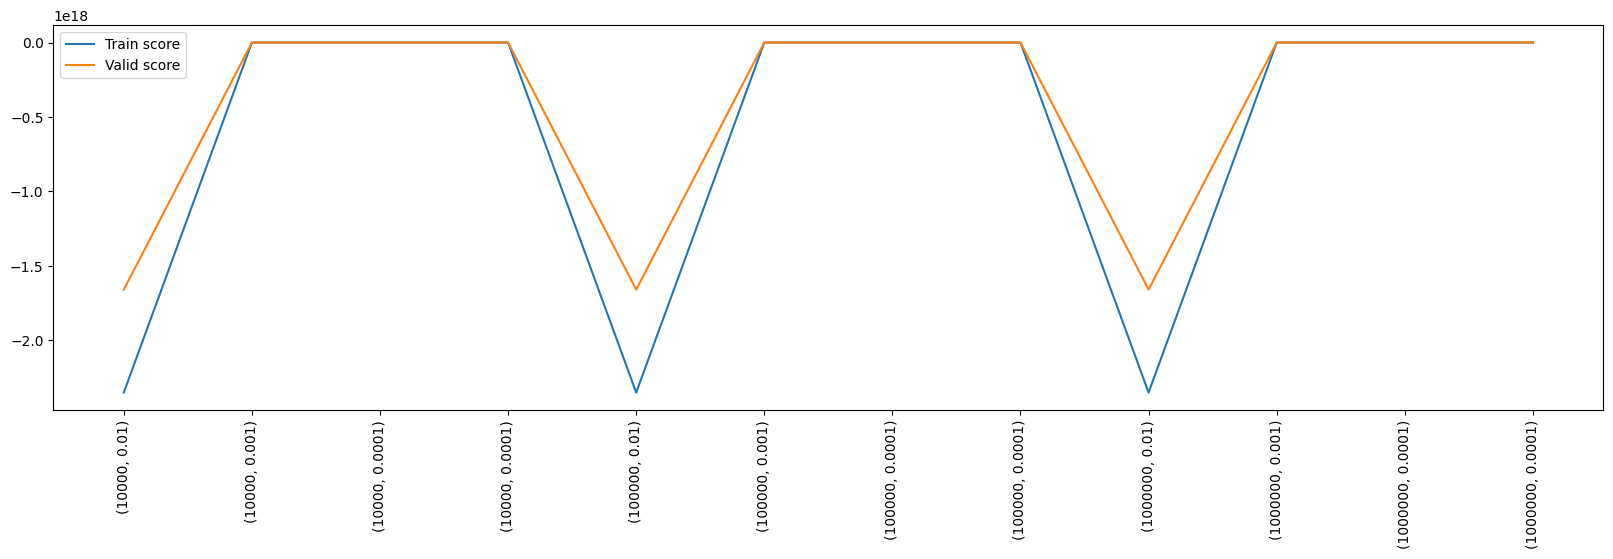

In [201]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(len(index_sgd)),  train_sgd, label = 'Train score')
plt.plot(range(len(index_sgd)), validation_sgd, label = 'Valid score')
plt.xticks(range(len(index_sgd)), index_sgd, rotation = 90)
plt.legend()
plt.show()

In [202]:
# check hyperparameter with lowest gap between train and valid data
data = {'hyperparameter': index_sgd,
        'train_score':train_sgd,
        'valid_score': validation_sgd}

# return dataframe
sgd_df = pd.DataFrame(data)
sgd_df

# return difference berween train and test score
sgd_df['train_valid_diff'] = sgd_df['train_score'] - sgd_df['valid_score']
sgd_df

# return row with minimum difference between test and train score
min_abs_diff = min(abs(sgd_df['train_valid_diff']))
sgd_df[abs(sgd_df['train_valid_diff']) == min_abs_diff]

,hyperparameter,train_score,valid_score,train_valid_diff
1,"(10000, 0.001)",0.025559,0.037369,-0.01181
5,"(100000, 0.001)",0.025559,0.037369,-0.01181
9,"(1000000, 0.001)",0.025559,0.037369,-0.01181


#### Polynomial Regression model

In [203]:
# import library
from sklearn.preprocessing import PolynomialFeatures

In [204]:
# define feature and target set - same dataset from sgd regression
X_train_poly_scaled, X_valid_poly_scaled, y_train_poly, y_valid_poly = X_train_sgd_scaled, X_valid_sgd_scaled, y_train_sgd, y_valid_sgd

In [205]:
# fit model 

# degree: 2
poly = PolynomialFeatures(degree = 2)
poly.fit(X_train_poly_scaled)

# transform and return result
X_train_poly_transform = poly.transform(X_train_poly_scaled)
X_valid_poly_transform = poly.transform(X_valid_poly_scaled)

In [206]:
# return shape
X_train_poly_transform.shape

(10432, 190)

In [207]:
# fit polynomial transformed features with linear regreesion model
# instantiate
lreg = LinearRegression()
# fit 
lreg.fit(X_train_poly_transform, y_train_poly)

LinearRegression()

In [208]:
# return train and validation r-score
print('train r2-score: ', lreg.score(X_train_poly_transform, y_train_poly))
print('validation r2-score: ', lreg.score(X_valid_poly_transform, y_valid_poly))

train r2-score:  0.07292846639985828
validation r2-score:  0.0745716578364003


In [209]:
# find best model hyperparameter: degree
train_poly = []
test_poly = []
index_poly = []
for i in range(2, 4):
    # instantiate
    poly_search = PolynomialFeatures(degree = i)
    
    # fit to X_train_poly_scaled
    poly_search.fit(X_train_poly_scaled)
    
    # transform and return result
    poly_transform_X_train = poly_search.transform(X_train_poly_scaled)
    poly_transform_X_valid = poly_search.transform(X_valid_poly_scaled)
    
    # instantiate Linear Regression model
    lreg = LinearRegression()
    # fit to data
    lreg.fit(poly_transform_X_train, y_train_poly)
    
    # return training and test r-score
    train_poly.append(lreg.score(poly_transform_X_train, y_train_poly))
    test_poly.append(lreg.score(poly_transform_X_valid, y_valid_poly))
    index_poly.append(i)

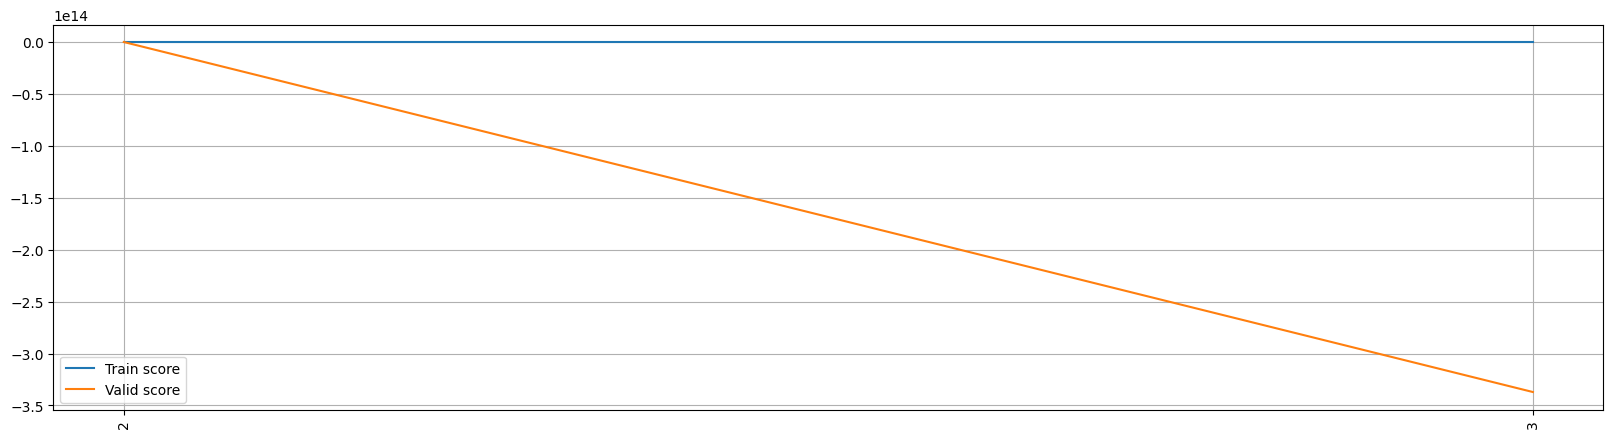

In [210]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(len(index_poly)), train_poly, label = 'Train score')
plt.plot(range(len(index_poly)), test_poly, label = 'Valid score')
plt.xticks(range(len(index_poly)), index_poly, rotation = 90)
plt.legend()
plt.grid()

In [211]:
# check hyperparameter with lowest gap between train and valid data
data = {'degree': index_poly,
        'train_score':train_poly,
        'valid_score': test_poly}

# return dataframe
poly_df = pd.DataFrame(data)
poly_df

# return difference berween train and test score
poly_df['train_valid_diff'] = poly_df['train_score'] - poly_df['valid_score']
poly_df

# return row with minimum difference between test and train score
min_abs_diff = min(abs(poly_df['train_valid_diff']))
poly_df[abs(poly_df['train_valid_diff']) == min_abs_diff]

,degree,train_score,valid_score,train_valid_diff
0,2,0.072928,0.074572,-0.001643


The hyperparameter with lowest gap between train and valid data for the polynomial regression is that with degree 2. The train score is 0.073 and the valid score is 0.075. The gap between train and valid score is -0.0016.

#### Decision Tree Regressor model

In [212]:
# import library
from sklearn.tree import DecisionTreeRegressor

In [213]:
# define feature and target set - from sgd regression
X_train_dtreg, X_valid_dtreg, y_train_dtreg, y_valid_dtreg = X_train_sgd_scaled, X_valid_sgd_scaled, y_train_sgd, y_valid_sgd

In [214]:
# fit model to X_train_dtreg, y_train_dtreg
# instantiate model; no early stopping
dtreg = DecisionTreeRegressor(random_state= 0)
# fir model with training data
dtreg.fit(X_train_dtreg, y_train_dtreg)

DecisionTreeRegressor(random_state=0)

In [215]:
# print train and valid r^2 score
print('Train r2-score:', dtreg.score(X_train_dtreg, y_train_dtreg))
print('Valid r2-score:', dtreg.score(X_valid_dtreg, y_valid_dtreg))

Train r2-score: 0.44591139163243354
Valid r2-score: 0.012948644494582329


From the training and valid r-2 score above, the decision tree regressor model without early stopping is in a state of overfitting and could not generalize to validation data.

Hyperparameter search

In [216]:
# find best model hyperparameter: max_depth
train_dtreg = []
test_dtreg = []
index_dtreg = []
for max_depth in range(1, 20):
    dtreg_search = DecisionTreeRegressor(random_state= 0, max_depth= max_depth)
    dtreg_search.fit(X_train_dtreg, y_train_dtreg)
    train_dtreg.append(dtreg_search.score(X_train_dtreg, y_train_dtreg))
    test_dtreg.append(dtreg_search.score(X_valid_dtreg, y_valid_dtreg))
    index_dtreg.append(max_depth)

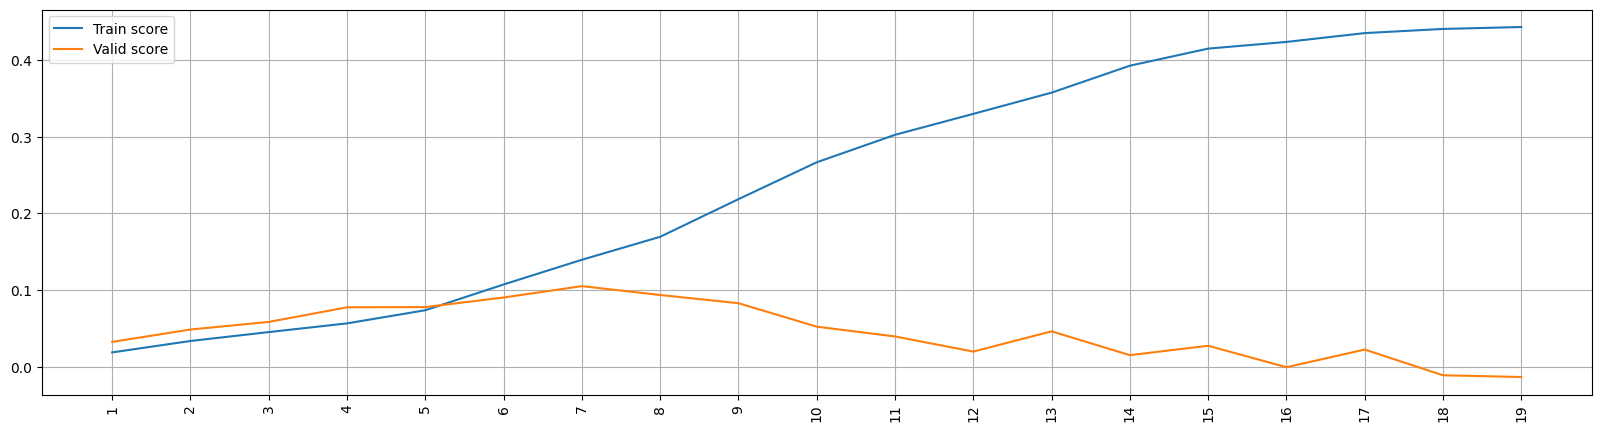

In [217]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(len(index_dtreg)), train_dtreg, label = 'Train score')
plt.plot(range(len(index_dtreg)), test_dtreg, label = 'Valid score')
plt.xticks(range(len(index_dtreg)), index_dtreg, rotation = 90)
plt.legend()
plt.grid()

In [218]:
# check hyperparameter with lowest gap between train and valid data
data = {'max_depth': index_dtreg,
        'train_score':train_dtreg,
        'valid_score': test_dtreg}

# return dataframe
dtreg_df = pd.DataFrame(data)
dtreg_df

# return difference berween train and test score
dtreg_df['train_valid_diff'] = dtreg_df['train_score'] - dtreg_df['valid_score']
dtreg_df

# return row with minimum difference between test and train score
min_abs_diff = min(abs(dtreg_df['train_valid_diff']))
dtreg_df[abs(dtreg_df['train_valid_diff']) == min_abs_diff]

,max_depth,train_score,valid_score,train_valid_diff
4,5,0.0741,0.078226,-0.004126


The best max_depth is 5, with a training score of 0.074 and a valid score of 0.078.

#### Random Forest Regressor model

In [219]:
from sklearn.ensemble import RandomForestRegressor

In [220]:
# define feature and target set - from sgd regression
X_train_rfreg, X_valid_rfreg, y_train_rfreg, y_valid_rfreg = X_train_sgd_scaled, X_valid_sgd_scaled, y_train_sgd, y_valid_sgd

In [221]:
# fit model to X_train_rfreg, y_train_rftreg
# instantiate model; no early stopping
rfreg = RandomForestRegressor(random_state= 0)
# fit model with training data
rfreg.fit(X_train_rfreg, y_train_rfreg)

RandomForestRegressor(random_state=0)

In [222]:
# print train and valid r^2 score: no early stopping
print('Train r2-score:', rfreg.score(X_train_rfreg, y_train_rfreg))
print('Valid r2-score:', rfreg.score(X_valid_rfreg, y_valid_rfreg))

Train r2-score: 0.4167379399110803
Valid r2-score: 0.05393678043229344


From the training and valid r-2 score above, the random forest regressor model without early stopping is in a state of overfitting and could not generalize to validation data.

Hyperparameter search 

In [223]:
# find best model hyperparameter: n_estimators, max_features, max_samples, max_depth
train_rfreg = []
test_rfreg = []
index_rfreg = []
for n_estimators in [100, 200, 500]:
    for max_features in [0.1, 0.5, 1.0]:
        for max_samples in [0.1, 0.5, 1.0]:
            for max_depth in [1, 2, 5, 8]:
                rfreg_search = RandomForestRegressor(random_state= 0, 
                                             n_estimators = n_estimators,
                                             max_samples= max_samples, 
                                             max_features= max_features, 
                                             max_depth= max_depth)
                rfreg_search.fit(X_train_rfreg, y_train_rfreg)
                train_rfreg.append(rfreg_search.score(X_train_rfreg, y_train_rfreg))
                test_rfreg.append(rfreg_search.score(X_valid_rfreg, y_valid_rfreg))
                index_rfreg.append((n_estimators, max_features, 
                              max_samples, max_depth))

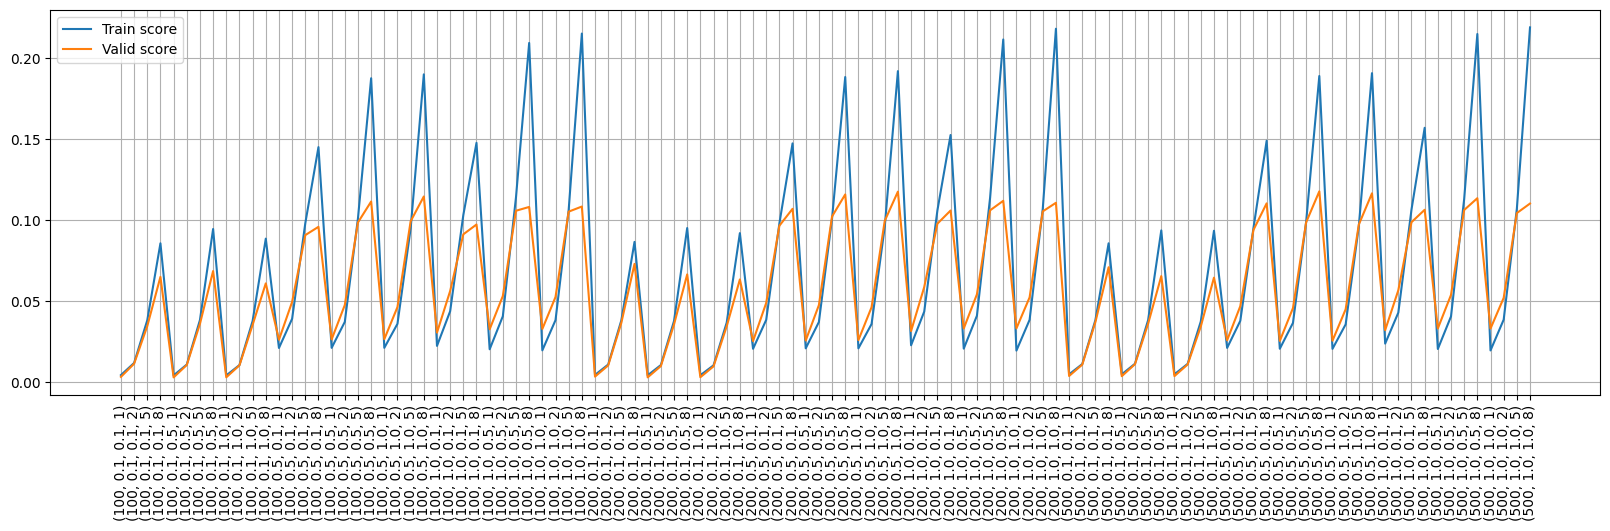

In [224]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(len(index_rfreg)), train_rfreg, label = 'Train score')
plt.plot(range(len(index_rfreg)), test_rfreg, label = 'Valid score')
plt.xticks(range(len(index_rfreg)), index_rfreg, rotation = 90)
plt.legend()
plt.grid()

In [225]:
# check hyperparameter with lowest gap between train and valid data
data = {'hyperparameter': index_rfreg,
        'train_score':train_rfreg,
        'valid_score': test_rfreg}

# return dataframe
rfreg_df = pd.DataFrame(data)
rfreg_df

# return difference berween train and test score
rfreg_df['train_valid_diff'] = rfreg_df['train_score'] - rfreg_df['valid_score']
rfreg_df

# return row with minimum difference between test and train score
min_abs_diff = min(abs(rfreg_df['train_valid_diff']))
rfreg_df[abs(rfreg_df['train_valid_diff']) == min_abs_diff]

,hyperparameter,train_score,valid_score,train_valid_diff
9,"(100, 0.1, 1.0, 2)",0.010485,0.010318,0.000167


### Regression prediction

The best model we choose from Regression Model Training is the Polynomial Regression with degree 2 which returned a train score is 0.073 and valid score is 0.075. Although the Decision Tree Regressor with max_depth 5 returned slightly better train and valid accuracy score of 0.074 and 0.078 respectively, the decision tree and random forest regressor is very sensitive to the splitting of the training data. The polynomial regressor, however, is less sensitive to this.

In [226]:
# instantiate best model

poly_best = PolynomialFeatures(degree = 2)

# fit to training datset 
poly_best.fit(X_train_scaled)

# transform and return result
X_train_transform = poly_best.transform(X_train_scaled)

# instantiate Linear Regression model
lreg = LinearRegression()

# fit to data
lreg.fit(X_train_transform, y_train)


LinearRegression()

In [227]:
# return train score
lreg.score(X_train_transform, y_train)

0.07795199540107323

In [228]:
# preprocess reg_test
reg_test_transform = poly_best.transform(reg_test_scaled)

# predict reg_test
y_test = lreg.predict(reg_test_transform)

In [229]:
y_test

array([47.2265625 , 48.375     , 57.01171875, ..., 50.14453125,
       37.44921875, 46.04296875])